# Compare Word-clouds based on Different Methods of Word Vectorization

Comparison process between word-clouds that are built based on 2 different word vectorization methods

## IMDB Movie reviews
IMDb (Internet Movie Database) is an online database that provides information about movies, TV shows, and other forms of entertainment. It also allows users to rate and review movies. IMDb movie reviews refer to the reviews written by users on the IMDb website.<br>

IMDb users can rate movies on a scale of 1 to 10 and write their own reviews to share their thoughts and opinions about a particular film. These reviews can range from brief comments to more detailed analyses. Users can discuss various aspects of the movie, such as the plot, acting, cinematography, directing, and overall entertainment value.<br>

IMDb movie reviews serve as a platform for movie enthusiasts to express their views and share recommendations with others. They can be helpful for people who are looking for opinions and insights before deciding to watch a movie. However, it's important to keep in mind that IMDb reviews are subjective and represent the opinions of individual users, so it's always a good idea to read multiple reviews and consider different perspectives.

## Purpose
**To Use Natural Language Processing (NLP) to Classify IMDb Movie Reviews**

## Objective
The objective of this project is to leverage Natural Language Processing techniques to analyze and classify IMDb movie reviews based on their content and sentiment. By utilizing existing scraped IMDb reviews, we aim to develop a robust classification model that can automatically categorize reviews into positive, negative, or neutral sentiments. This classification can provide valuable insights for movie enthusiasts, filmmakers, and other stakeholders in the entertainment industry.

## Methodology

Data Preprocessing: The scraped IMDb reviews will undergo preprocessing steps such as tokenization, removing stopwords, stemming or lemmatization, and handling any noise or inconsistencies in the data.<br>

Feature Extraction: NLP techniques will be applied to extract meaningful features from the preprocessed reviews. These features may include bag-of-words representations, TF-IDF (Term Frequency-Inverse Document Frequency) vectors, or word embeddings like Word2Vec or GloVe.<br>

Model Training: Various machine learning or deep learning algorithms will be explored to train a classification model on the labeled IMDb review dataset. This can include traditional algorithms such as Naive Bayes, Support Vector Machines, or more advanced techniques like Recurrent Neural Networks (RNNs) or Transformers.<br>

Sentiment Classification: The trained model will be used to predict the sentiment of unseen IMDb movie reviews. Sentiments can be classified as positive, negative, or neutral based on the learned patterns and features extracted from the training data.<br>

Evaluation: The performance of the classification model will be assessed using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. The model will be fine-tuned and optimized to achieve the best possible results.<br>

Deployment and Application: Once the classification model is trained and evaluated, it can be deployed as an automated system or integrated into an existing platform. This can allow users to submit new IMDb reviews and receive real-time sentiment analysis.

## Expected Outcomes

Accurate Sentiment Classification: The NLP model will be capable of accurately classifying IMDb movie reviews into positive, negative, or neutral sentiments, enabling efficient sentiment analysis on a large scale.<br>

Insights for Movie Industry: The classification results can provide valuable insights to movie industry professionals, allowing them to gauge audience reactions, identify trends, and make informed decisions regarding film production, marketing, and distribution.<br>

Enhanced User Experience: Users visiting IMDb or other movie review platforms can benefit from the sentiment analysis provided by the NLP model. They can quickly filter and browse reviews based on sentiment, helping them make informed decisions about which movies to watch.<br>

Research and Development: The project can contribute to the advancement of NLP techniques, sentiment analysis, and text classification algorithms, furthering the field's understanding of processing and interpreting large-scale textual data.<br>

By employing NLP techniques to classify IMDb movie reviews, we can enhance the utility of the data, provide valuable insights to stakeholders, and improve the overall movie-watching experience for users.

In [12]:
# Import Libraries to classify the movies reviews
import pandas as pd
import numpy as np
import nltk
import time
import datetime
from datetime import timedelta
import urllib.request
from bs4 import BeautifulSoup
import random
import re
import emoji
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
# from pattern.en import suggest
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.probability import FreqDist
from nltk import ngrams
import spacy
import contextualSpellCheck
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors


nlp = spacy.load('en_core_web_sm')
contextualSpellCheck.add_to_pipe(nlp)

%matplotlib inline
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflow_hub'

# Scrapping
---
## Dataset collection

In [2]:
# Maximum number of attempts
MAX_ATTEMPTS = 4

# User agents for HTTP requests
USER_AGENTS = """Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36
Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36
Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.36
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36
Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36
Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1944.0 Safari/537.36
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.3319.102 Safari/537.36
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2117.157 Safari/537.36
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1866.237 Safari/537.36
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.137 Safari/4E423F
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.116 Safari/537.36 Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Version/4.0.4 Mobile/7B334b Safari/531.21.10
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.517 Safari/537.36
Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.16 Safari/537.36
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1623.0 Safari/537.36
Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/30.0.1599.17 Safari/537.36
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.62 Safari/537.36
Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36
Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1468.0 Safari/537.36
Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1467.0 Safari/537.36
Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1464.0 Safari/537.36
Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36
Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36
Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.22 (KHTML, like Gecko) Chrome/19.0.1047.0 Safari/535.22
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.21 (KHTML, like Gecko) Chrome/19.0.1042.0 Safari/535.21
Mozilla/5.0 (X11; Linux i686) AppleWebKit/535.21 (KHTML, like Gecko) Chrome/19.0.1041.0 Safari/535.21
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.20 (KHTML, like Gecko) Chrome/19.0.1036.7 Safari/535.20
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.2 (KHTML, like Gecko) Chrome/18.6.872.0 Safari/535.2 UNTRUSTED/1.0 3gpp-gba UNTRUSTED/1.0
Mozilla/5.0 (Macintosh; AMD Mac OS X 10_8_2) AppleWebKit/535.22 (KHTML, like Gecko) Chrome/18.6.872
Mozilla/5.0 (X11; CrOS i686 1660.57.0) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.46 Safari/535.19
Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.45 Safari/535.19
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.45 Safari/535.19
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.45 Safari/535.19
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166 Safari/535.19
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_5_8) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.151 Safari/535.19
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.19 (KHTML, like Gecko) Ubuntu/11.10 Chromium/18.0.1025.142 Chrome/18.0.1025.142 Safari/535.19
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.11 Safari/535.19
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (X11; Linux i686) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Windows NT 6.2) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Windows NT 6.0) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_5_8) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.66 Safari/535.11
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.11 (KHTML, like Gecko) Ubuntu/11.10 Chromium/17.0.963.65 Chrome/17.0.963.65 Safari/535.11
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.11 (KHTML, like Gecko) Ubuntu/11.04 Chromium/17.0.963.65 Chrome/17.0.963.65 Safari/535.11
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.11 (KHTML, like Gecko) Ubuntu/10.10 Chromium/17.0.963.65 Chrome/17.0.963.65 Safari/535.11
Mozilla/5.0 (X11; Linux i686) AppleWebKit/535.11 (KHTML, like Gecko) Ubuntu/11.10 Chromium/17.0.963.65 Chrome/17.0.963.65 Safari/535.11
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.700.3 Safari/534.24
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.699.0 Safari/534.24
Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.699.0 Safari/534.24
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_6) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.698.0 Safari/534.24
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.697.0 Safari/534.24
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.71 Safari/534.24
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.68 Safari/534.24
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_7) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.68 Safari/534.24
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_5_8) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.68 Safari/534.24
Mozilla/5.0 Slackware/13.37 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/11.0.696.50
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.43 Safari/534.24
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.34 Safari/534.24
Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.34 Safari/534.24
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.3 Safari/534.24
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.3 Safari/534.24
Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.3 Safari/534.24
Mozilla/5.0 (X11; Linux i686) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.14 Safari/534.24
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.12 Safari/534.24
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_6) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.12 Safari/534.24
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/534.24 (KHTML, like Gecko) Ubuntu/10.04 Chromium/11.0.696.0 Chrome/11.0.696.0 Safari/534.24
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_0) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.0 Safari/534.24
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.694.0 Safari/534.24
Mozilla/5.0 (X11; Linux i686) AppleWebKit/534.23 (KHTML, like Gecko) Chrome/11.0.686.3 Safari/534.23
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.21 (KHTML, like Gecko) Chrome/11.0.682.0 Safari/534.21
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.21 (KHTML, like Gecko) Chrome/11.0.678.0 Safari/534.21
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7_0; en-US) AppleWebKit/534.21 (KHTML, like Gecko) Chrome/11.0.678.0 Safari/534.21
Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.672.2 Safari/534.20
Mozilla/5.0 (Windows NT) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.672.2 Safari/534.20
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; en-US) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.672.2 Safari/534.20
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.669.0 Safari/534.20
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.19 (KHTML, like Gecko) Chrome/11.0.661.0 Safari/534.19
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.18 (KHTML, like Gecko) Chrome/11.0.661.0 Safari/534.18
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; en-US) AppleWebKit/534.18 (KHTML, like Gecko) Chrome/11.0.660.0 Safari/534.18
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/11.0.655.0 Safari/534.17
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_4; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/11.0.655.0 Safari/534.17
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/11.0.654.0 Safari/534.17
Mozilla/5.0 (Windows; U; Windows NT 5.2; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/11.0.652.0 Safari/534.17
Mozilla/4.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/11.0.1245.0 Safari/537.36
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/10.0.649.0 Safari/534.17
Mozilla/5.0 (Windows; U; Windows NT 6.1; de-DE) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/10.0.649.0 Safari/534.17
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.82 Safari/534.16
Mozilla/5.0 (X11; U; Linux armv7l; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.204 Safari/534.16
Mozilla/5.0 (X11; U; FreeBSD x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.204 Safari/534.16
Mozilla/5.0 (X11; U; FreeBSD i386; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.204 Safari/534.16
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_5; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.204
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.134 Safari/534.16
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.134 Safari/534.16
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.134 Safari/534.16
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.134 Safari/534.16
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.648.133 Chrome/10.0.648.133 Safari/534.16
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.648.133 Chrome/10.0.648.133 Safari/534.16
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16
Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_3; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_2; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.648.127 Chrome/10.0.648.127 Safari/534.16
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.127 Safari/534.16
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_4; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.127 Safari/534.16
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_5_8; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.127 Safari/534.16
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.11 Safari/534.16
Mozilla/5.0 (Windows; U; Windows NT 6.1; ru-RU; AppleWebKit/534.16; KHTML; like Gecko; Chrome/10.0.648.11;Safari/534.16)
Mozilla/5.0 (Windows; U; Windows NT 6.1; ru-RU) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.11 Safari/534.16
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.11 Safari/534.16
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.648.0 Chrome/10.0.648.0 Safari/534.16
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.648.0 Chrome/10.0.648.0 Safari/534.16
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_4; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.0 Safari/534.16
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.642.0 Chrome/10.0.642.0 Safari/534.16
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_5; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.639.0 Safari/534.16
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.638.0 Safari/534.16
Mozilla/5.0 (X11; U; Linux i686 (x86_64); en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.634.0 Safari/534.16
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.634.0 Safari/534.16
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.16 SUSE/10.0.626.0 (KHTML, like Gecko) Chrome/10.0.626.0 Safari/534.16
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Chrome/10.0.613.0 Safari/534.15
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.613.0 Chrome/10.0.613.0 Safari/534.15
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Ubuntu/10.04 Chromium/10.0.612.3 Chrome/10.0.612.3 Safari/534.15
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Chrome/10.0.612.1 Safari/534.15
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.15 (KHTML, like Gecko) Ubuntu/10.10 Chromium/10.0.611.0 Chrome/10.0.611.0 Safari/534.15
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/10.0.602.0 Safari/534.14
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/10.0.601.0 Safari/534.14
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/10.0.601.0 Safari/534.14
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/540.0 (KHTML,like Gecko) Chrome/9.1.0.0 Safari/540.0
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/540.0 (KHTML, like Gecko) Ubuntu/10.10 Chrome/9.1.0.0 Safari/540.0
Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/9.0.601.0 Safari/534.14
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Ubuntu/10.10 Chromium/9.0.600.0 Chrome/9.0.600.0 Safari/534.14
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/9.0.600.0 Safari/534.14
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.599.0 Safari/534.13
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-CA) AppleWebKit/534.13 (KHTML like Gecko) Chrome/9.0.597.98 Safari/534.13
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.84 Safari/534.13
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.44 Safari/534.13
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.19 Safari/534.13
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.15 Safari/534.13
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_5; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.15 Safari/534.13
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.107 Safari/534.13 v1416758524.9051
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.107 Safari/534.13 v1416748405.3871
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.107 Safari/534.13 v1416670950.695
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.107 Safari/534.13 v1416664997.4379
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.107 Safari/534.13 v1333515017.9196
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US)  AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13
Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_5; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13
Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_4; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.596.0 Safari/534.13
Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Ubuntu/10.04 Chromium/9.0.595.0 Chrome/9.0.595.0 Safari/534.13
Mozilla/5.0 (X11; U; Linux i686; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Ubuntu/9.10 Chromium/9.0.592.0 Chrome/9.0.592.0 Safari/534.13
Mozilla/5.0 (X11; U; Windows NT 6; en-US) AppleWebKit/534.12 (KHTML, like Gecko) Chrome/9.0.587.0 Safari/534.12
Mozilla/5.0 (Windows  U  Windows NT 5.1  en-US) AppleWebKit/534.12 (KHTML, like Gecko) Chrome/9.0.583.0 Safari/534.12""".split(
    "\n"
)

In [3]:
def download_page(url: str, attempts=1) -> BeautifulSoup:
    """
    Downloads the HTML content of a web page at the given URL and returns it as a BeautifulSoup object.

    Args:
        url (str): The URL of the web page to download.

    Returns:
        BeautifulSoup: A BeautifulSoup object representing the parsed HTML content of the web page.

    Raises:
        Exception: If there is an error during the download or parsing of the web page.
    """
    try:
        agent = random.choice(USER_AGENTS)
        headers = {"User-Agent": agent}
        req = urllib.request.Request(url, headers=headers)
        resp = urllib.request.urlopen(req)
        resp_data = str(resp.read())
        return BeautifulSoup(resp_data, "html.parser")
    except Exception as ex:
        print(emoji.emojize(f':cross_mark: {ex}'))
        if attempts <= MAX_ATTEMPTS:
            return download_page(url, attempts + 1)
        return None

In [4]:
def get_detail_review(content: object):
    """
    Extracts details from a review content and returns them as individual elements.

    Args:
        content (BeautifulSoup): The BeautifulSoup object representing the review content.

    Returns:
        tuple: A tuple containing the following elements:
            - _spoilers (bool): True if spoilers are present in the review, False otherwise.
            - _rating (str): The rating given in the review.
            - _title (str): The title of the review.
            - _user (str): The username associated with the review.
            - _date (str): The date of the review.
            - _content (str): The text content of the review.

    Note:
        The elements in the returned tuple may be empty strings if the corresponding data is not available in the review content.
    """
    _spoilers = True if content.find_all("span", class_="spoiler-warning__control") else False
    _rating = [item.text for data in content.find_all("span", class_="rating-other-user-rating") for item in
               data.find_all("span")]
    _title = [data.text.replace(r"\n", "") for data in content.find_all("a") if data.get(r"\nclass") == "title"]
    _user = [item for data in content.find_all("div", class_="display-name-date") for item in data.find("a")]
    _date = [data.text for data in content.find_all("span", class_="review-date")]
    _content = [data.text for data in content.find_all("div", class_="text")]

    _rating = "".join(_rating).strip() if _rating else ""
    _title = _title[0].strip() if _title else ""
    _user = _user[0].strip() if _user else ""
    _date = _date[0].strip() if _date else ""
    _content = _content[0].strip() if _content else ""

    return _spoilers, _rating, _title, _user, _date, _content

In [5]:
def extract_reviews(midb_ids: list) -> pd.DataFrame:
    """
    Extracts the most recent reviews (first page) from IMDb for a list of movie IDs and returns them as a pandas DataFrame.

    Args:
        midb_ids (list): A list of movie IDs for which reviews need to be extracted.

    Returns:
        pd.DataFrame: A pandas DataFrame containing the extracted reviews with columns: ["midb_id", "movie", "spoilers", "rating", "title", "user", "date", "content"].

    Note:
        The returned DataFrame may contain empty values for columns where the corresponding data is not available for a review.
    """
    df = pd.DataFrame([], columns=["position", "midb_id", "movie", "spoilers", "rating", "title", "user", "date", "content"])
    for index, midb in enumerate(midb_ids):
        for rating in range(1, 11):
            try:
                review_url = f"https://www.imdb.com/title/{midb}/reviews?sort=curated&dir=desc&ratingFilter={str(rating)}"
                print(emoji.emojize(f':globe_with_meridians: {review_url}'))
                time.sleep(random.randint(1, 4))
                html_reviews = download_page(review_url)
                if not html_reviews:
                    print(emoji.emojize(f':loudly_crying_face: >> {review_url}'))
                    break

                movie = [item.text.replace(r"\n", "") for item in html_reviews.find_all("a") if item.get(r"\nitemprop") or item.get("itemprop")]
                movie = movie[0] if movie else ""

                reviews = html_reviews.find_all("div", class_="review-container")
                for review in reviews:
                    _spoilers, _rating, _title, _user, _date, _content = get_detail_review(review)
                    df.loc[len(df)] = [index, midb, movie, _spoilers, _rating, _title, _user, _date, _content]
                    print(emoji.emojize(f"\t:film_frames: {_title[:40]}"))
            except Exception as ex:
                print(emoji.emojize(f':cross_mark: {ex}'))
    return df

In [6]:
def extract_all_movies(url: str) -> pd.DataFrame:
    """
    Extracts reviews for all movies from IMDb starting from the given URL and returns them as a pandas DataFrame.

    Args:
        url (str): The URL of the starting page from where the movie reviews extraction should begin.

    Returns:
        pd.DataFrame: A pandas DataFrame containing the extracted movie reviews with columns: ["spoilers", "rating", "title", "user", "date", "content"].

    Note:
        This function recursively extracts reviews for all movies by following the "Next" page links until there are no more pages to extract.

    """
    print(emoji.emojize(f'\n:double_exclamation_mark: {url}'))
    top_movies = download_page(url)

    # Identify midb_id
    items = [re.findall("[a-z0-9A-Z]+\/\?", item.get("href"))[0].replace("/?", "") for item in top_movies.find_all("a")
             if item.get("href") and "=adv_li_tt" in item.get("href")]
    df_reviews = extract_reviews(items)
    is_next_page = [data.get("href") for data in top_movies.find_all("a") if data.get(r"\nclass") == "lister-page-next next-page"]
    
    if is_next_page:
        next_page = f"https://www.imdb.com{is_next_page[0]}"
        df_reviews = pd.concat([df_reviews, extract_all_movies(next_page)], ignore_index=True)

    return df_reviews

In [7]:
# Load the scrapping data
FILE_REVIEWS = "reviews.csv"
if not os.path.exists(FILE_REVIEWS):
    _start = time.time()
    print("Started:", datetime.datetime.now())
    
    print("-"*50)
    print(emoji.emojize(':warning: SCRAPPING....'))
    print("-"*50)
    
    # Top 100 movies
    url = "https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc&ref_=adv_nxt"
    df_reviews = extract_all_movies(url)
    
    _end = time.time()
    print("Ended:", datetime.datetime.now())
    print("DURATION:", timedelta(seconds=_end - _start))
    
    df_reviews.to_csv(FILE_REVIEWS)
else:
    print("-"*50)
    print(emoji.emojize(':bookmark_tabs: READ FILE SCRAPPING...'))
    print("-"*50)
    df_reviews = pd.read_csv(FILE_REVIEWS, index_col=0)

NameError: name 'os' is not defined

# Wrangling and Cleansing
---

In [20]:
# Check the dataframe shape
df_reviews.shape

(20311, 9)

In [21]:
# Check datatypes in the dataframe
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20311 entries, 0 to 20310
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   position  20311 non-null  int64 
 1   midb_id   20311 non-null  object
 2   movie     20311 non-null  object
 3   spoilers  20311 non-null  bool  
 4   rating    20311 non-null  object
 5   title     20311 non-null  object
 6   user      20311 non-null  object
 7   date      20311 non-null  object
 8   content   20311 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


In [22]:
# Set Nan to blank value
df_reviews = df_reviews.replace('', np.nan)

In [23]:
# Indentify percentage of null
percentage_null = df_reviews.isna().mean().mul(100).to_frame()
percentage_null.rename(columns={0: "percentage"}, errors="raise", inplace=True)
percentage_null

percentage
position         0.0
midb_id          0.0
movie            0.0
spoilers         0.0
rating           0.0
title            0.0
user             0.0
date             0.0
content          0.0

This code sets the max_colwidth option of the Pandas library to 400. This option controls the maximum width of column contents displayed when printing or viewing a DataFrame.

In [24]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.options.display.max_colwidth = None

In [25]:
# List the top 5 reviews
df_reviews.head()

position    midb_id                     movie  spoilers rating                                                       title           user              date  \
0         0  tt0111161  The Shawshank Redemption     False   1/10                              Pale imitation of better films      sbaradell      10 July 2003   
1         0  tt0111161  The Shawshank Redemption     False   1/10                                       Didactic and overlong  arthur_pewtey  19 November 2000   
2         0  tt0111161  The Shawshank Redemption     False   1/10                     Mediocre people reward mediocre cinema.        kylemax       24 May 2005   
3         0  tt0111161  The Shawshank Redemption     False   1/10  The plain & simple truth. It doesn\'t deserve to be at #2.    lukemccaine      10 June 2007   
4         0  tt0111161  The Shawshank Redemption     False   1/10                          Not the greatest movie of all time      Hollywd-2       10 May 1999   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 content  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Three words: "Cool Hand Luke."  Same film, done better, done earlier.  For that matter, is this film any better than other Steven King "novelettes" such as "Stand By Me"? All in all, it probably ranks a 6 or a 7, but since people on this site have lost their minds as regards this film, I give it a 1 in one man's attempt at sanity.  
1                                                                                                                                                                                                                                       Another one of those overlong morally right-on movies that never rises above average - saved only by the acting.Its bleeding-heart politics 'dignity of individual maintained in adverse conditions' is played-out well enough but actually lacks any real dramatic tension.Dufrane is a two-dimensional character who seems to go through the drama by numbers - there's never any doubt that he will triumph in the end, it's only a matter of how.Tim Robbins has done many more interesting films than this one - try The Player or Bob Roberts if y

In [26]:
# List the last 5 reviews
df_reviews.tail()

position    midb_id                                     movie  spoilers rating                                                                                                                        title           user               date  \
20306        49  tt0022100  M - Eine Stadt sucht einen M\xc3\xb6rder     False  10/10                                                                                                              extremely scary      chewy_548     24 August 2005   
20307        49  tt0022100  M - Eine Stadt sucht einen M\xc3\xb6rder     False  10/10                                                                                                              Classic Mystery  dee_in_dakota      26 April 2005   
20308        49  tt0022100  M - Eine Stadt sucht einen M\xc3\xb6rder     False  10/10  One of the most influential films ever, almost every filmed story of a Psychotic killer owes it\'s existence to this movie.     Unimonster  27 September 2003   
20309        49  tt0022100  M - Eine Stadt sucht einen M\xc3\xb6rder     False  10/10                                                                                                             M a few thoughts          rxcdr      28 March 2003   
20310        49  tt0022100  M - Eine Stadt sucht einen M\xc3\xb6rder     False  10/10                                                                                            Still a remarkably powerful film.       a.v. boy      24 March 1999   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                content  
20306                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Text Cleaning

In [27]:
def massive_fuction(values: object, function_object: object) -> object:
    """
    Applies the given function_object to each element in the values list.

    If values is not a list, the function_object is applied directly to it.

    Args:
        values (list or any): A list of values or a single value.
        function_object (function): A function to apply to the values.

    Returns:
        list or any: A list of transformed values or a single transformed value.
    """
    if isinstance(values, str):
        return function_object(values)
    
    for k, v in enumerate(values):
        values[k] = function_object(v)
    
    return values    

In [28]:
def remove_special_char(value: str) -> str:
    """
    Removes special characters from the given value.

    Args:
        value (str): The string value to remove special characters from.

    Returns:
        str: The value with special characters removed.
    """
    # Remove/replace special chars
    value = value.replace(r"\'", "'")
    value = value.replace(r'\xc2\x80', '')
    value = value.replace(r'\xc2\x81', '')
    value = value.replace(r'\xc2\x82', '')
    value = value.replace(r'\xc2\x83', '')
    value = value.replace(r'\xc2\x84', '')
    value = value.replace(r'\xc2\x85', '')
    value = value.replace(r'\xc2\x86', '')
    value = value.replace(r'\xc2\x87', '')
    value = value.replace(r'\xc2\x88', '')
    value = value.replace(r'\xc2\x89', '')
    value = value.replace(r'\xc2\x8a', '')
    value = value.replace(r'\xc2\x8b', '')
    value = value.replace(r'\xc2\x8c', '')
    value = value.replace(r'\xc2\x8d', '')
    value = value.replace(r'\xc2\x8e', '')
    value = value.replace(r'\xc2\x8f', '')
    value = value.replace(r'\xc2\x90', '')
    value = value.replace(r'\xc2\x91', '')
    value = value.replace(r'\xc2\x92', '')
    value = value.replace(r'\xc2\x93', '')
    value = value.replace(r'\xc2\x94', '')
    value = value.replace(r'\xc2\x95', '')
    value = value.replace(r'\xc2\x96', '')
    value = value.replace(r'\xc2\x97', '')
    value = value.replace(r'\xc2\x98', '')
    value = value.replace(r'\xc2\x99', '')
    value = value.replace(r'\xc2\x9a', '')
    value = value.replace(r'\xc2\x9b', '')
    value = value.replace(r'\xc2\x9c', '')
    value = value.replace(r'\xc2\x9d', '')
    value = value.replace(r'\xc2\x9e', '')
    value = value.replace(r'\xc2\x9f', '')
    value = value.replace(r'\xc2\xa0', '')
    value = value.replace(r'\xc2\xa1', '¡')
    value = value.replace(r'\xc2\xa2', '¢')
    value = value.replace(r'\xc2\xa3', '£')
    value = value.replace(r'\xc2\xa4', '¤')
    value = value.replace(r'\xc2\xa5', '¥')
    value = value.replace(r'\xc2\xa6', '¦')
    value = value.replace(r'\xc2\xa7', '§')
    value = value.replace(r'\xc2\xa8', '¨')
    value = value.replace(r'\xc2\xa9', '©')
    value = value.replace(r'\xc2\xaa', 'ª')
    value = value.replace(r'\xc2\xab', '«')
    value = value.replace(r'\xc2\xac', '¬')
    value = value.replace(r'\xc2\xad', '­')
    value = value.replace(r'\xc2\xae', '®')
    value = value.replace(r'\xc2\xaf', '¯')
    value = value.replace(r'\xc2\xb0', '°')
    value = value.replace(r'\xc2\xb1', '±')
    value = value.replace(r'\xc2\xb2', '²')
    value = value.replace(r'\xc2\xb3', '³')
    value = value.replace(r'\xc2\xb4', '´')
    value = value.replace(r'\xc2\xb5', 'µ')
    value = value.replace(r'\xc2\xb6', '¶')
    value = value.replace(r'\xc2\xb7', '·')
    value = value.replace(r'\xc2\xb8', '¸')
    value = value.replace(r'\xc2\xb9', '¹')
    value = value.replace(r'\xc2\xba', 'º')
    value = value.replace(r'\xc2\xbb', '»')
    value = value.replace(r'\xc2\xbc', '¼')
    value = value.replace(r'\xc2\xbd', '½')
    value = value.replace(r'\xc2\xbe', '¾')
    value = value.replace(r'\xc2\xbf', '¿')
    value = value.replace(r'\xc3\x80', 'À')
    value = value.replace(r'\xc3\x81', 'Á')
    value = value.replace(r'\xc3\x82', 'Â')
    value = value.replace(r'\xc3\x83', 'Ã')
    value = value.replace(r'\xc3\x84', 'Ä')
    value = value.replace(r'\xc3\x85', 'Å')
    value = value.replace(r'\xc3\x86', 'Æ')
    value = value.replace(r'\xc3\x87', 'Ç')
    value = value.replace(r'\xc3\x88', 'È')
    value = value.replace(r'\xc3\x89', 'É')
    value = value.replace(r'\xc3\x8a', 'Ê')
    value = value.replace(r'\xc3\x8b', 'Ë')
    value = value.replace(r'\xc3\x8c', 'Ì')
    value = value.replace(r'\xc3\x8d', 'Í')
    value = value.replace(r'\xc3\x8e', 'Î')
    value = value.replace(r'\xc3\x8f', 'Ï')
    value = value.replace(r'\xc3\x90', 'Ð')
    value = value.replace(r'\xc3\x91', 'Ñ')
    value = value.replace(r'\xc3\x92', 'Ò')
    value = value.replace(r'\xc3\x93', 'Ó')
    value = value.replace(r'\xc3\x94', 'Ô')
    value = value.replace(r'\xc3\x95', 'Õ')
    value = value.replace(r'\xc3\x96', 'Ö')
    value = value.replace(r'\xc3\x97', '×')
    value = value.replace(r'\xc3\x98', 'Ø')
    value = value.replace(r'\xc3\x99', 'Ù')
    value = value.replace(r'\xc3\x9a', 'Ú')
    value = value.replace(r'\xc3\x9b', 'Û')
    value = value.replace(r'\xc3\x9c', 'Ü')
    value = value.replace(r'\xc3\x9d', 'Ý')
    value = value.replace(r'\xc3\x9e', 'Þ')
    value = value.replace(r'\xc3\x9f', 'ß')
    value = value.replace(r'\xc3\xa0', 'à')
    value = value.replace(r'\xc3\xa1', 'á')
    value = value.replace(r'\xc3\xa2', 'â')
    value = value.replace(r'\xc3\xa3', 'ã')
    value = value.replace(r'\xc3\xa4', 'ä')
    value = value.replace(r'\xc3\xa5', 'å')
    value = value.replace(r'\xc3\xa6', 'æ')
    value = value.replace(r'\xc3\xa7', 'ç')
    value = value.replace(r'\xc3\xa8', 'è')
    value = value.replace(r'\xc3\xa9', 'é')
    value = value.replace(r'\xc3\xaa', 'ê')
    value = value.replace(r'\xc3\xab', 'ë')
    value = value.replace(r'\xc3\xac', 'ì')
    value = value.replace(r'\xc3\xad', 'í')
    value = value.replace(r'\xc3\xae', 'î')
    value = value.replace(r'\xc3\xaf', 'ï')
    value = value.replace(r'\xc3\xb0', 'ð')
    value = value.replace(r'\xc3\xb1', 'ñ')
    value = value.replace(r'\xc3\xb2', 'ò')
    value = value.replace(r'\xc3\xb3', 'ó')
    value = value.replace(r'\xc3\xb4', 'ô')
    value = value.replace(r'\xc3\xb5', 'õ')
    value = value.replace(r'\xc3\xb6', 'ö')
    value = value.replace(r'\xc3\xb7', '÷')
    value = value.replace(r'\xc3\xb8', 'ø')
    value = value.replace(r'\xc3\xb9', 'ù')
    value = value.replace(r'\xc3\xba', 'ú')
    value = value.replace(r'\xc3\xbb', 'û')
    value = value.replace(r'\xc3\xbc', 'ü')
    value = value.replace(r'\xc3\xbd', 'ý')
    value = value.replace(r'\xc3\xbe', 'þ')
    value = value.replace(r'\xc3\xbf', 'ÿ')
    
    # Remove emojis in byte format
    regrex_pattern = re.compile(pattern = r"[\\]?\\x[a-zA-Z0-9]+(\\x[a-zA-Z0-9]+)?")
    return regrex_pattern.sub(r'', value).strip()

In [29]:
# Change object datatype to date
df_reviews["date"] = pd.to_datetime(df_reviews['date'], format='mixed')

In [30]:
# Create new columns month and year
df_reviews["month"] = df_reviews['date'].dt.month
df_reviews["year"] = df_reviews['date'].dt.year

In [31]:
# Get rating number
df_reviews["rating"] = df_reviews["rating"].str.replace("/10", "")

In [32]:
# Change object datatype to int
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce').astype('Int64')

In [33]:
# Remove years in movie title
df_reviews['movie'] = df_reviews['movie'].apply(lambda x: re.sub(r"\([0-9]+\)", "", x).strip())

In [34]:
# Create content length column
df_reviews['content_length'] = df_reviews['content'].apply(len)

In [35]:
# Remove some special chars and emojis from the title an content columns
df_reviews[["movie", "title", "content"]] = df_reviews[["movie", "title", "content"]].apply(massive_fuction, function_object=remove_special_char)

In [36]:
# Create new field to identify how many paragraph has the review
df_reviews["paragraph"] = df_reviews["content"].apply(lambda x: len(sent_tokenize(x)))

## EDA (Exploratory Data Analysis)

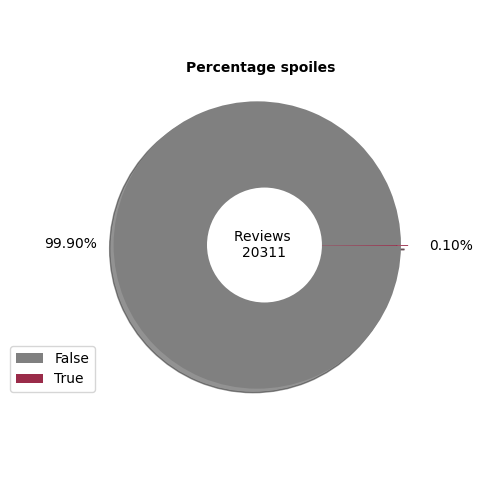

In [37]:
# Graph % spoilets
df_spoilers_by_movie = df_reviews.groupby(by=["spoilers"])["spoilers"].count()
total_movies = f"Reviews \n{df_reviews.shape[0]}"
n_explote = df_reviews["spoilers"].nunique()
explode = [0.05 if n == 0 else 0 for n in range(n_explote)]
list_colors = ['#9A2B49' if s == min(df_spoilers_by_movie) else 'grey' for s in df_spoilers_by_movie]

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot()
ax.pie(
    "spoilers",
    data=df_spoilers_by_movie.to_frame(),
    explode=explode,
    labels=None,
    autopct="%.2f%%",
    pctdistance=1.3,
    shadow=True,
    colors=list_colors
)
ax.legend(df_reviews["spoilers"].unique(), bbox_to_anchor =(0, 0.3))
centre_circle = plt.Circle((0, 0), 0.40, fc="white")

fig.gca().add_artist(centre_circle)
plt.title("Percentage spoiles", fontweight='bold', fontsize='10', y=0.85)
ax.text(
    0.0,
    0.0,
    total_movies,
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=10,
)
ax.axis("equal")
plt.tight_layout()
plt.show()

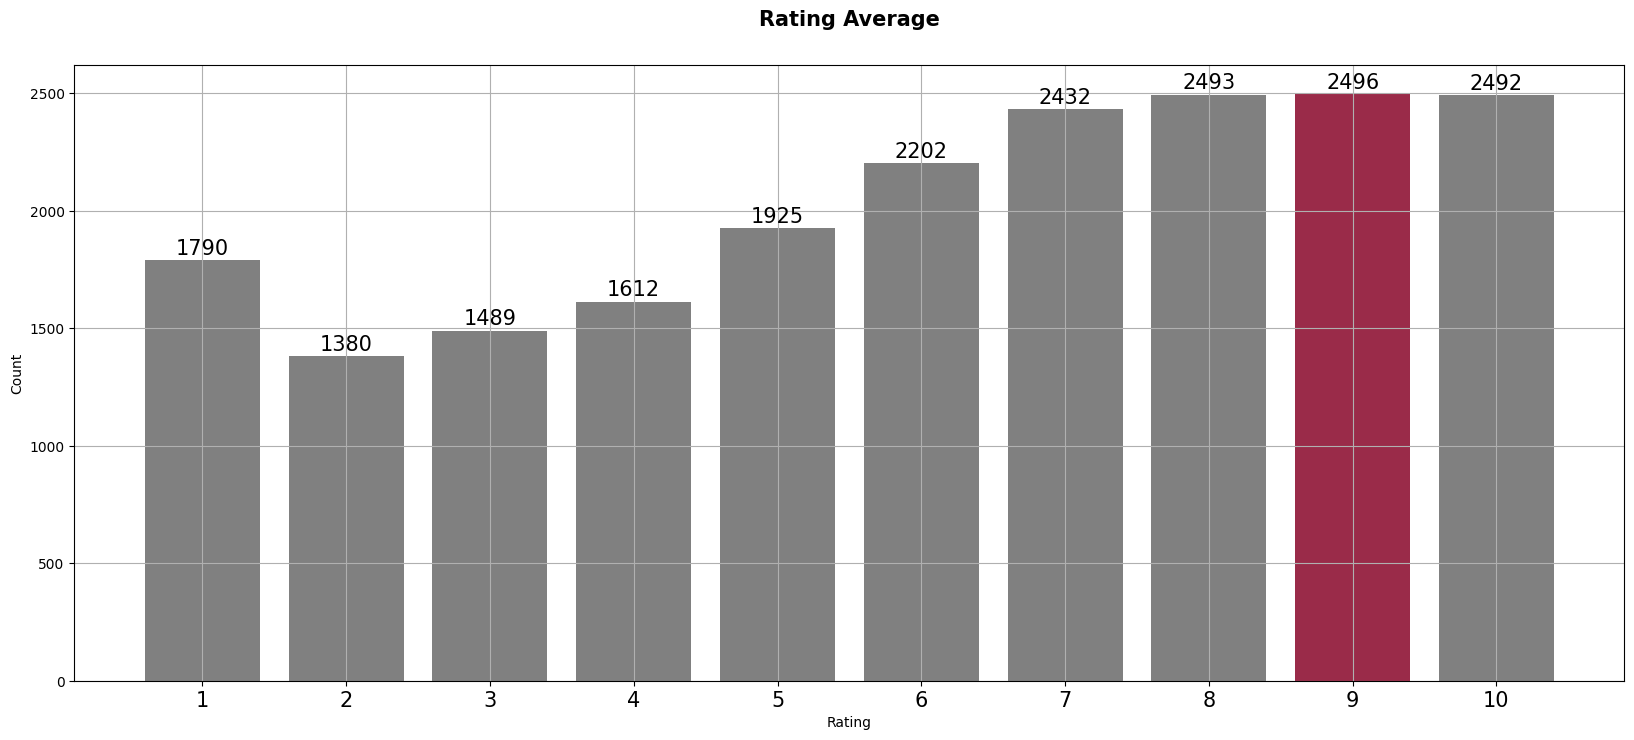

In [38]:
# Rating Average
df_rating_average = df_reviews.groupby(by=["rating"])["rating"].count()

list_colors = ['grey' if s < max(df_rating_average) else '#9A2B49' for s in df_rating_average]
plt.figure(figsize=(20,8))
plt.bar(df_rating_average.index, df_rating_average, color=list_colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(np.arange(df_reviews["rating"].nunique()) + 1,df_reviews["rating"].unique(), fontsize='15',)
plt.title("Rating Average", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_rating_average.index, df_rating_average):
    label = "{:}".format(y)
    plt.annotate(label, (x, y + 50), ha='center', va='center', size=15)
plt.grid()
plt.show()

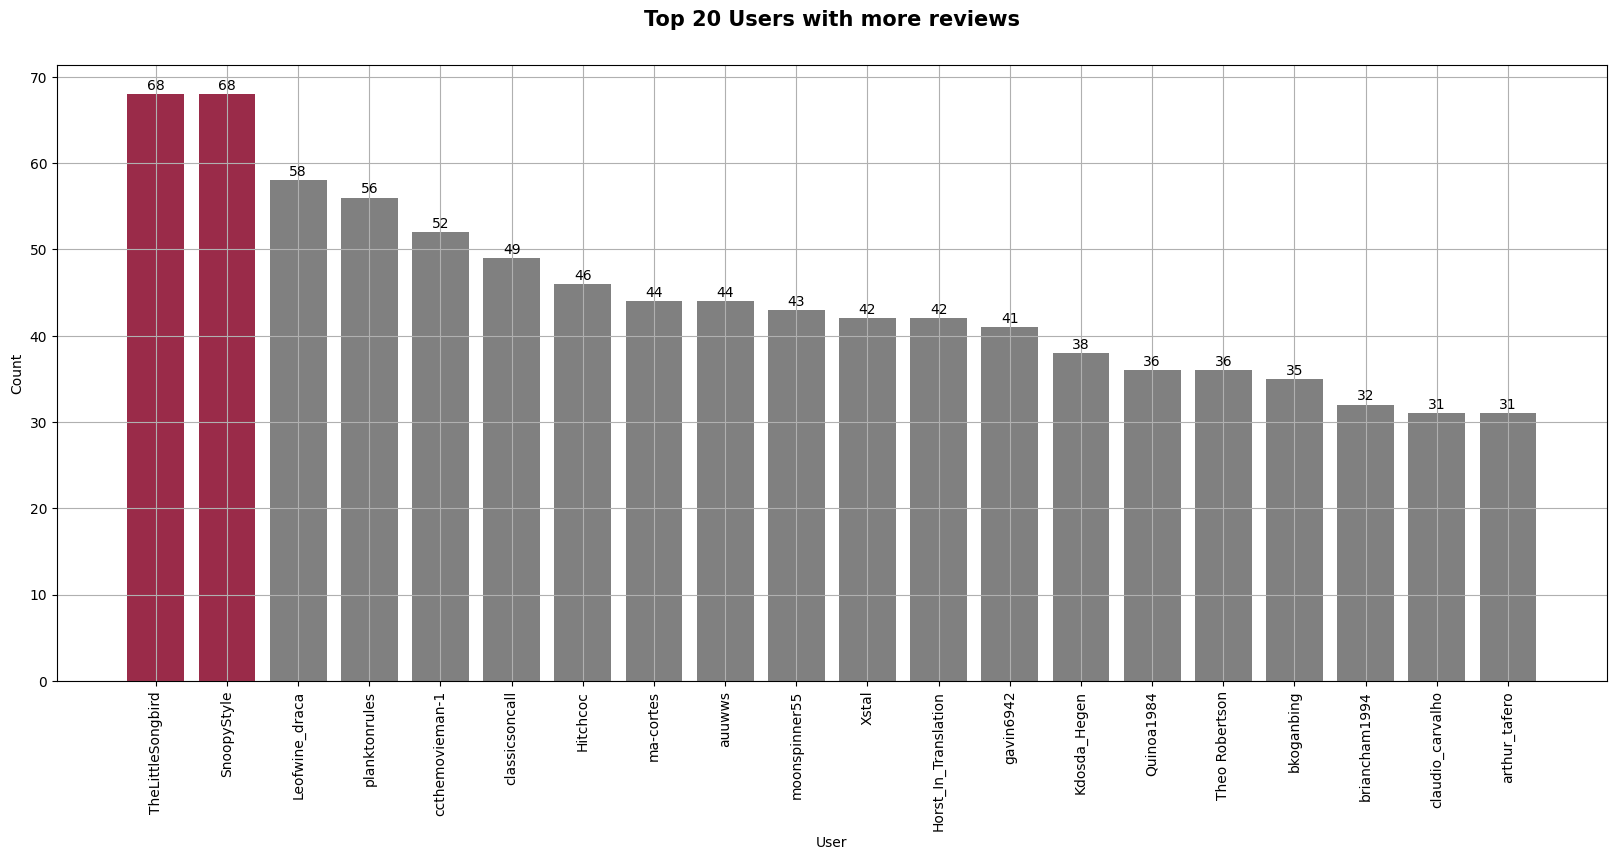

In [39]:
# Top user with more reviews
df_top_user_reviews = df_reviews.groupby(by=["user"])["user"].count().sort_values(ascending=False).head(20)

list_colors = ['grey' if s < max(df_top_user_reviews) else '#9A2B49' for s in df_top_user_reviews]
plt.figure(figsize=(20,8))
plt.bar(df_top_user_reviews.index, df_top_user_reviews, color=list_colors)
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks(fontsize='10', rotation = 90)
plt.title("Top 20 Users with more reviews", fontweight='bold', fontsize='15', y=1.05)
for x, y in zip(df_top_user_reviews.index, df_top_user_reviews):
    label = "{:}".format(y)
    plt.annotate(label, (x, y + 1), ha='center', va='center', size=10)
plt.grid()
plt.show()

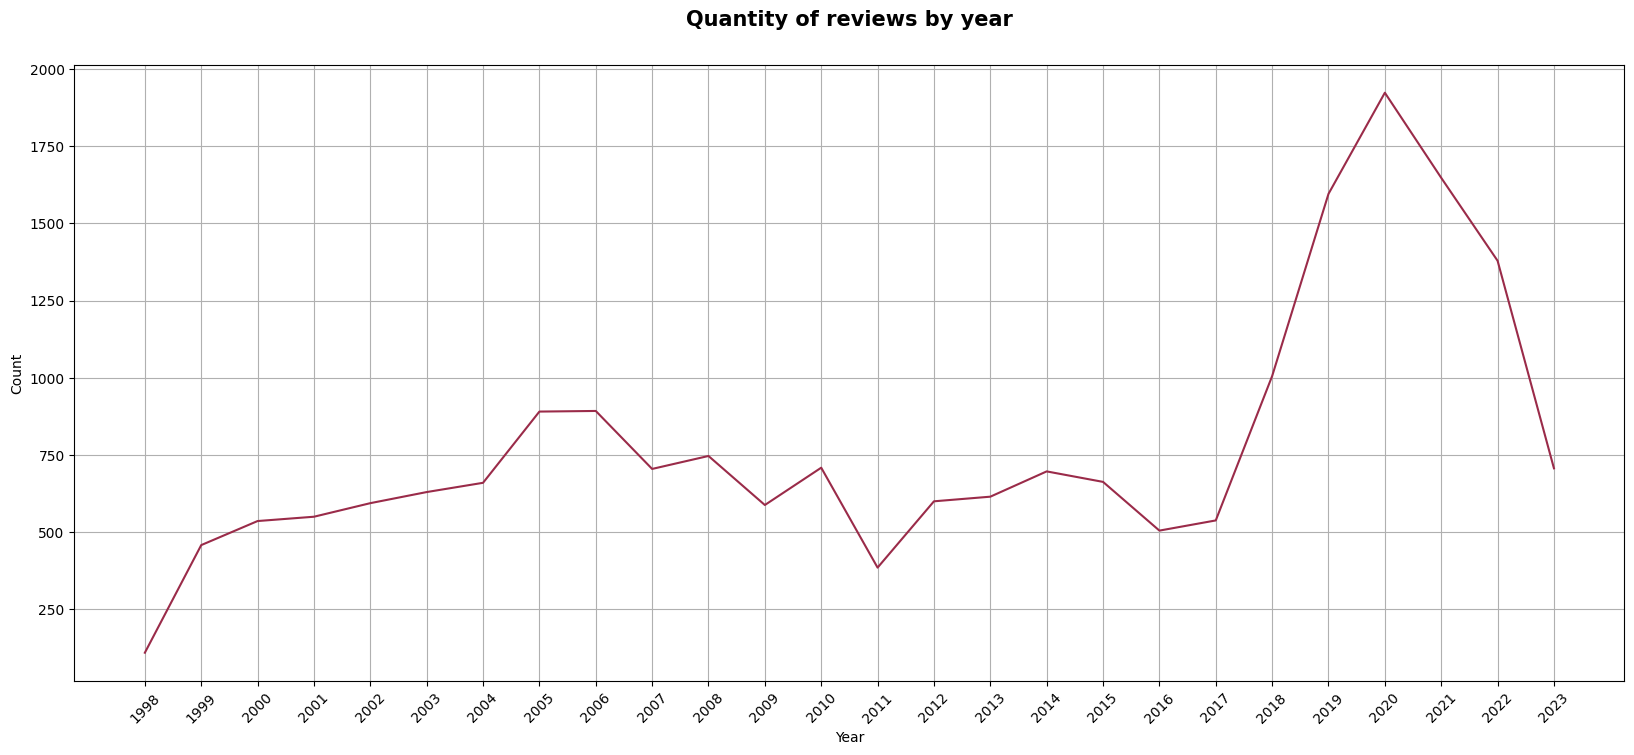

In [40]:
# Quantity of review by year
df_quantity_by_year = df_reviews.groupby(by=["year"])["year"].count()

plt.figure(figsize=(20,8))
plt.xlabel('Year')
plt.ylabel('Count')
plt.plot(df_quantity_by_year, color="#9A2B49")
plt.xticks(np.arange(min(df_quantity_by_year.index), max(df_quantity_by_year.index) +1), fontsize='10', rotation = 45)
plt.title("Quantity of reviews by year", fontweight='bold', fontsize='15', y=1.05)
plt.grid()
plt.show()

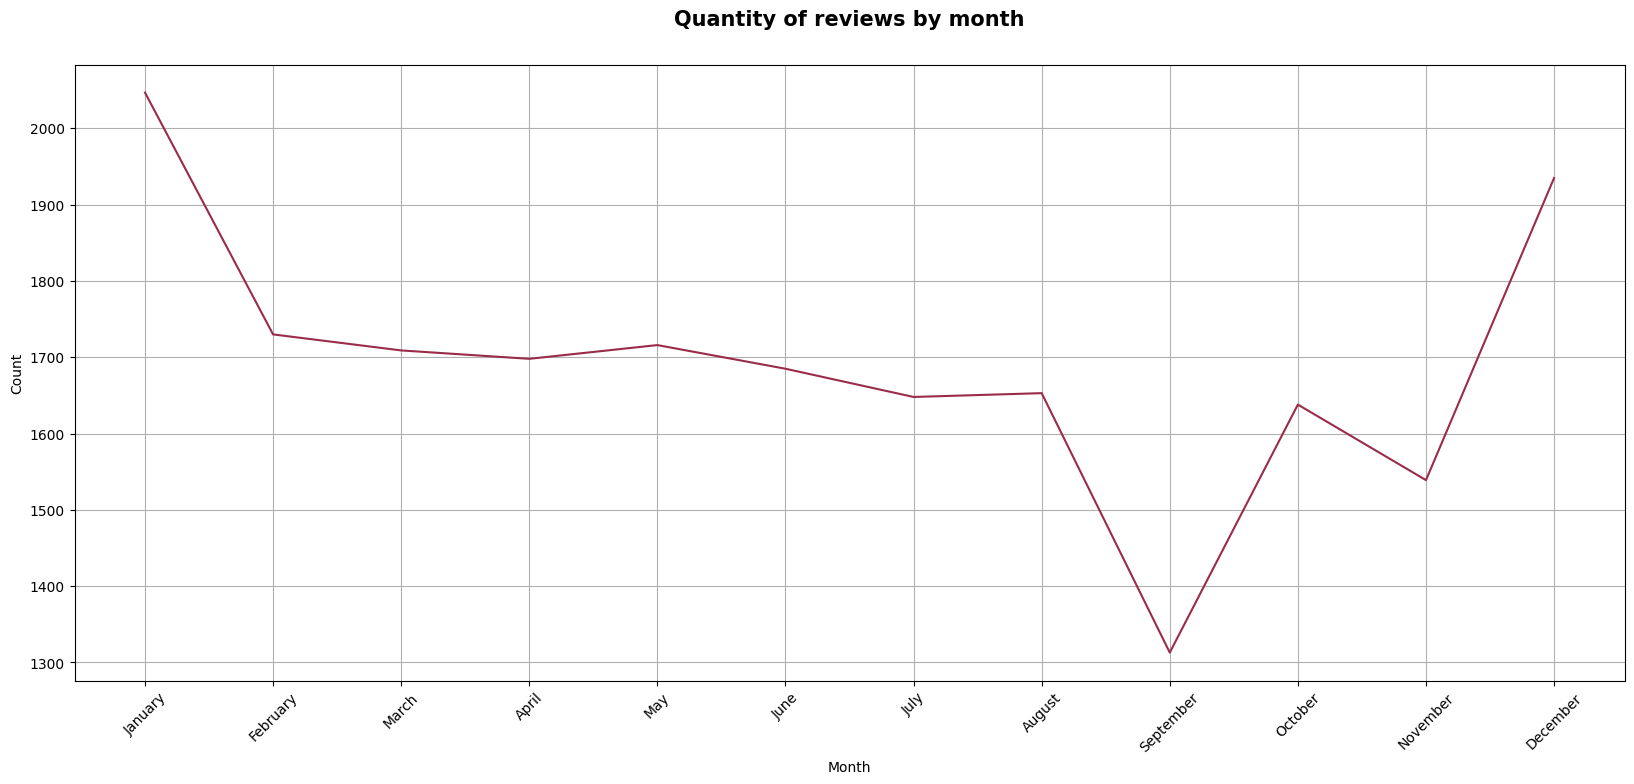

In [41]:
# Quantity of review by month
df_quantity_by_month = df_reviews.groupby(by=["month"])["month"].count()

plt.figure(figsize=(20,8))
plt.xlabel('Month')
plt.ylabel('Count')

plt.plot(df_quantity_by_month, color="#9A2B49")
plt.xticks(np.arange(min(df_quantity_by_month.index), max(df_quantity_by_month.index) +1), calendar.month_name[1:], fontsize='10', rotation = 45)
plt.title("Quantity of reviews by month", fontweight='bold', fontsize='15', y=1.05)
plt.grid()
plt.show()

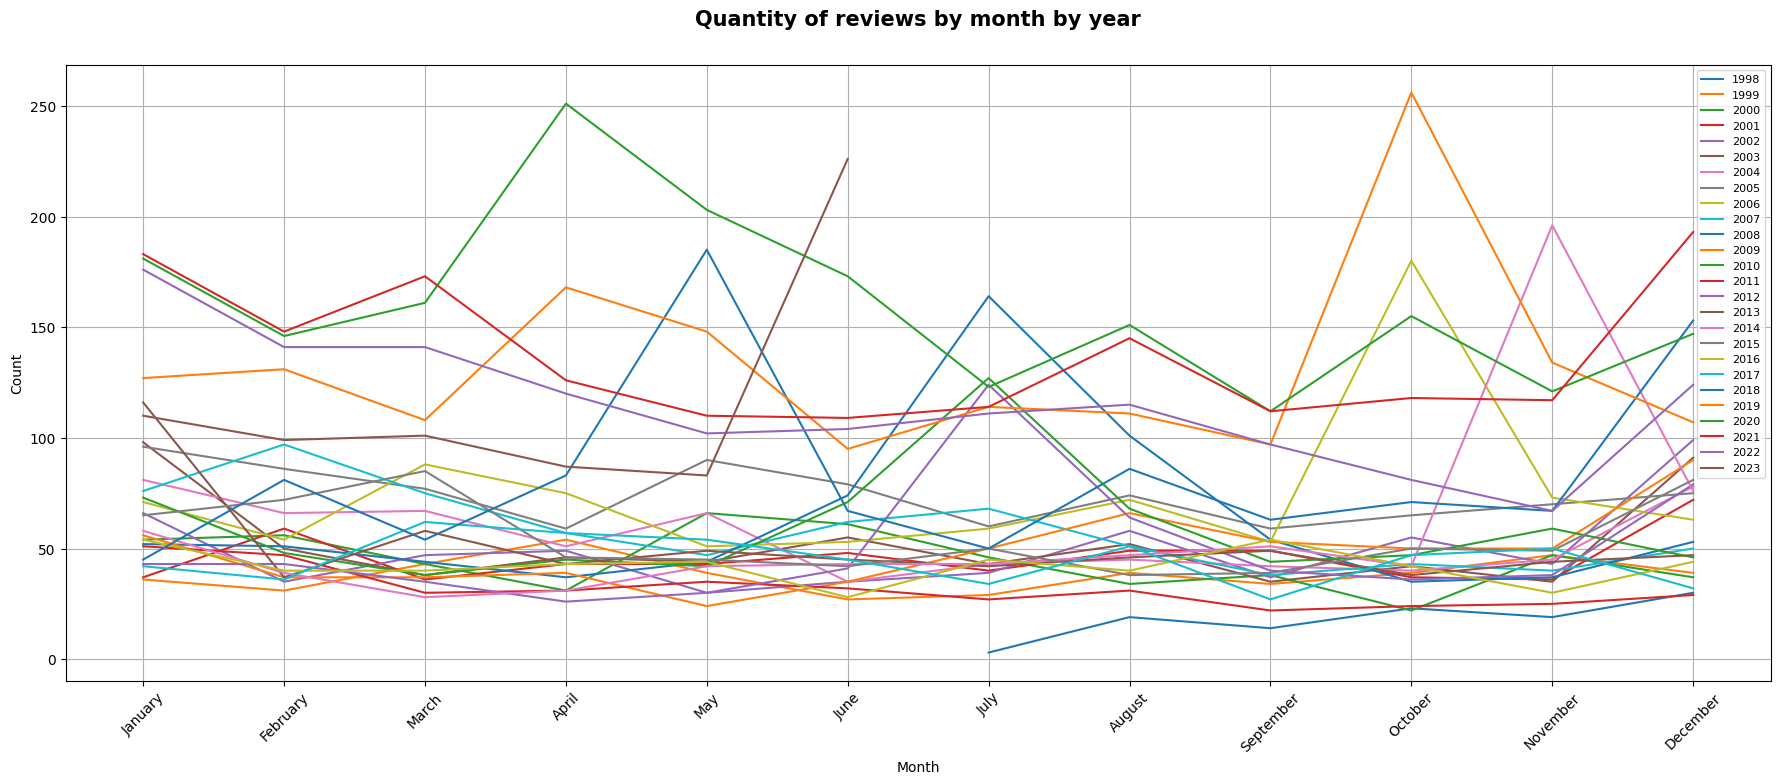

In [42]:
# Quantity of review by month by year
df_quantity_by_month = df_reviews.groupby(['year', 'month']).size().reset_index(name='count').sort_values(by=['year', 'month'])
plt.figure(figsize=(22,8))
plt.xlabel('Month')
plt.ylabel('Count')

for item in df_quantity_by_month["year"].unique():
    plt.plot('month', 'count', data=df_quantity_by_month[df_quantity_by_month["year"]==item], label=item)

plt.xticks(np.arange(1, 13), calendar.month_name[1:], fontsize='10', rotation = 45)
plt.title("Quantity of reviews by month by year", fontweight='bold', fontsize='15', y=1.05)
plt.legend(fontsize=8, loc="upper right")
plt.grid()
plt.show()

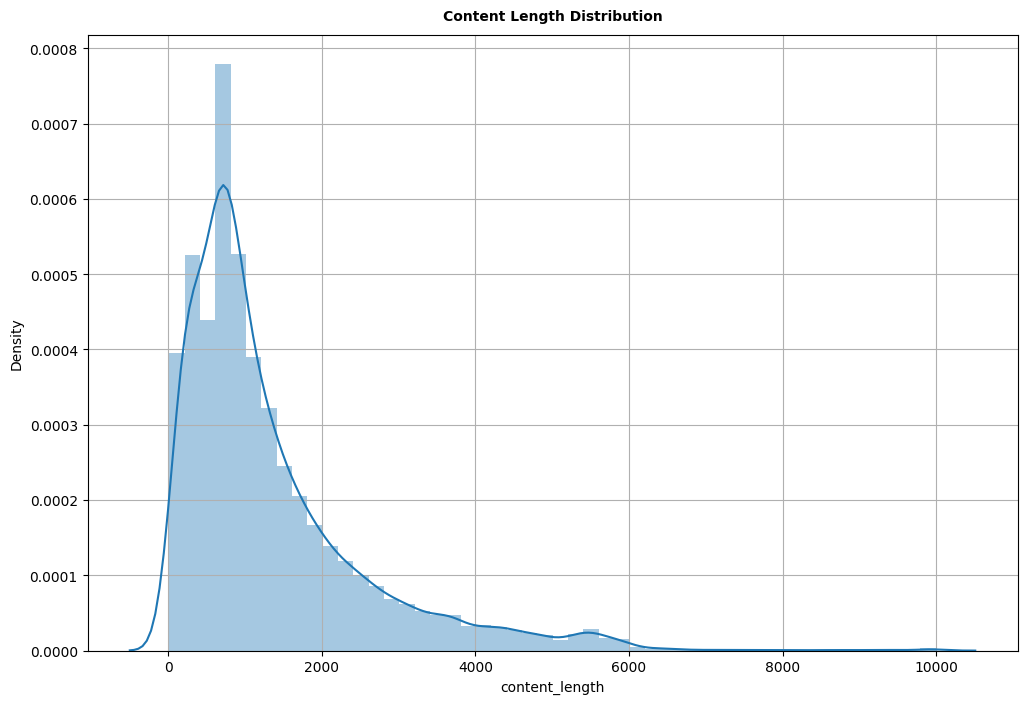

In [43]:
# Content Length Distribution
fig = plt.figure(figsize=(12,8))
sns.distplot(df_reviews['content_length'])
plt.title('Content Length Distribution', fontweight='bold', fontsize='10', y=1.01)
plt.grid()
plt.show()

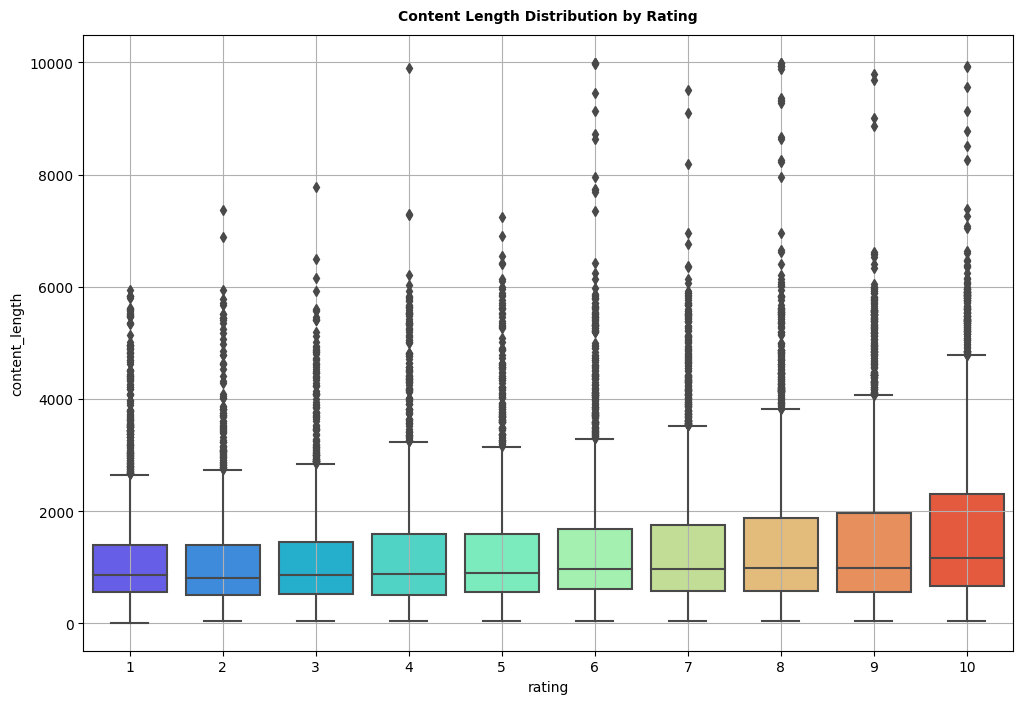

In [44]:
# Content Length Distribution by Rating
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='rating', y='content_length', data=df_reviews, palette='rainbow')
plt.title('Content Length Distribution by Rating', fontweight='bold', fontsize='10', y=1.01)
plt.grid()
plt.show()

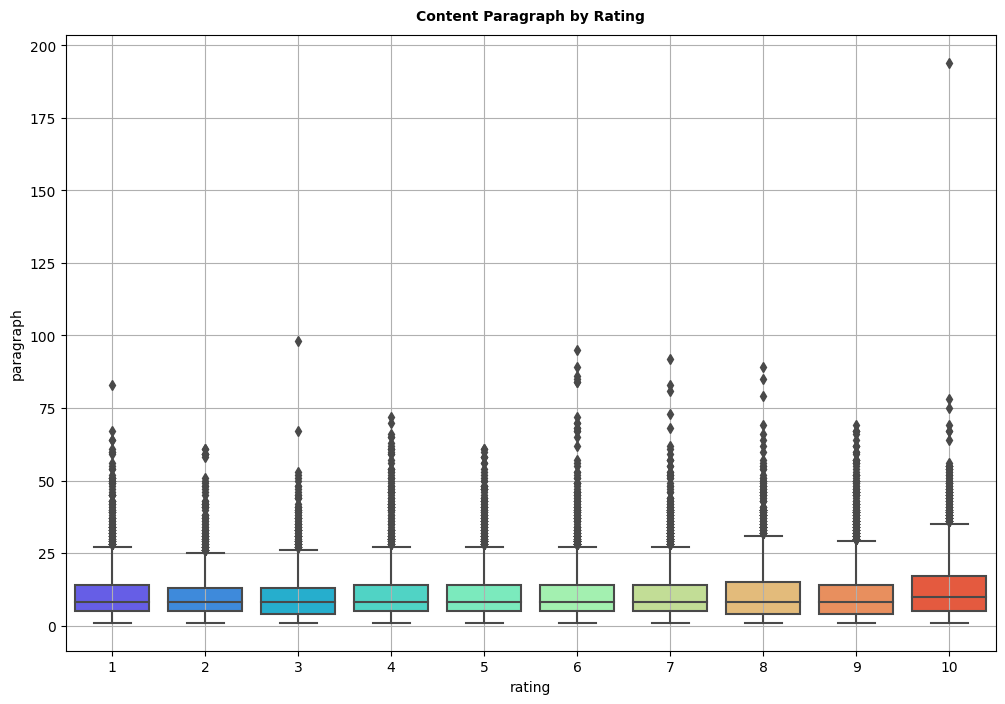

In [45]:
# Content Paragraph by Rating
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='rating', y='paragraph', data=df_reviews, palette='rainbow')
plt.title('Content Paragraph by Rating', fontweight='bold', fontsize='10', y=1.01)
plt.grid()
plt.show()

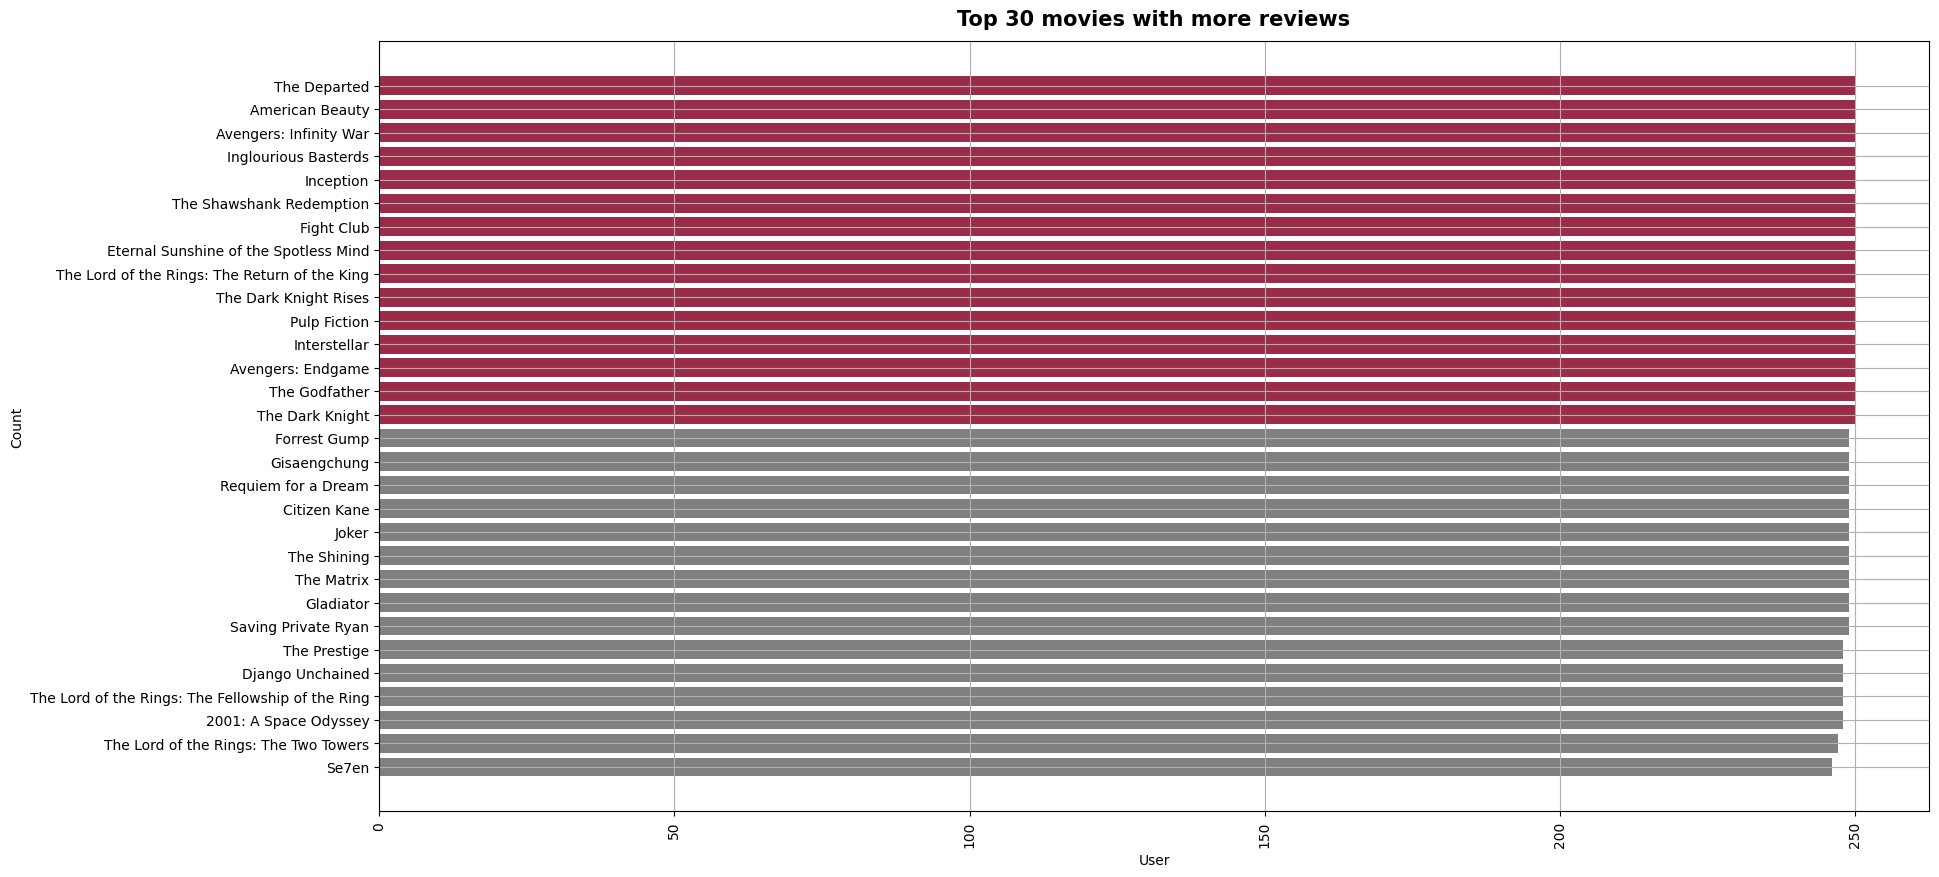

In [46]:
# Top 30 movies with more reviews
df_top_movies_more_reviews = df_reviews.groupby(by=["movie"]).size().reset_index(name='count').sort_values(by=['count'], ascending=False).head(30)
df_top_movies_more_reviews = df_top_movies_more_reviews.sort_values(by=['count'], ascending=True)
list_colors = ['grey' if s < max(df_top_movies_more_reviews["count"]) else '#9A2B49' for s in df_top_movies_more_reviews["count"]]
plt.figure(figsize=(20,10))
plt.barh(df_top_movies_more_reviews["movie"], df_top_movies_more_reviews["count"], color=list_colors)
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks(fontsize='10', rotation = 90)
plt.title("Top 30 movies with more reviews", fontweight='bold', fontsize='15', y=1.01)
plt.grid()
plt.show()

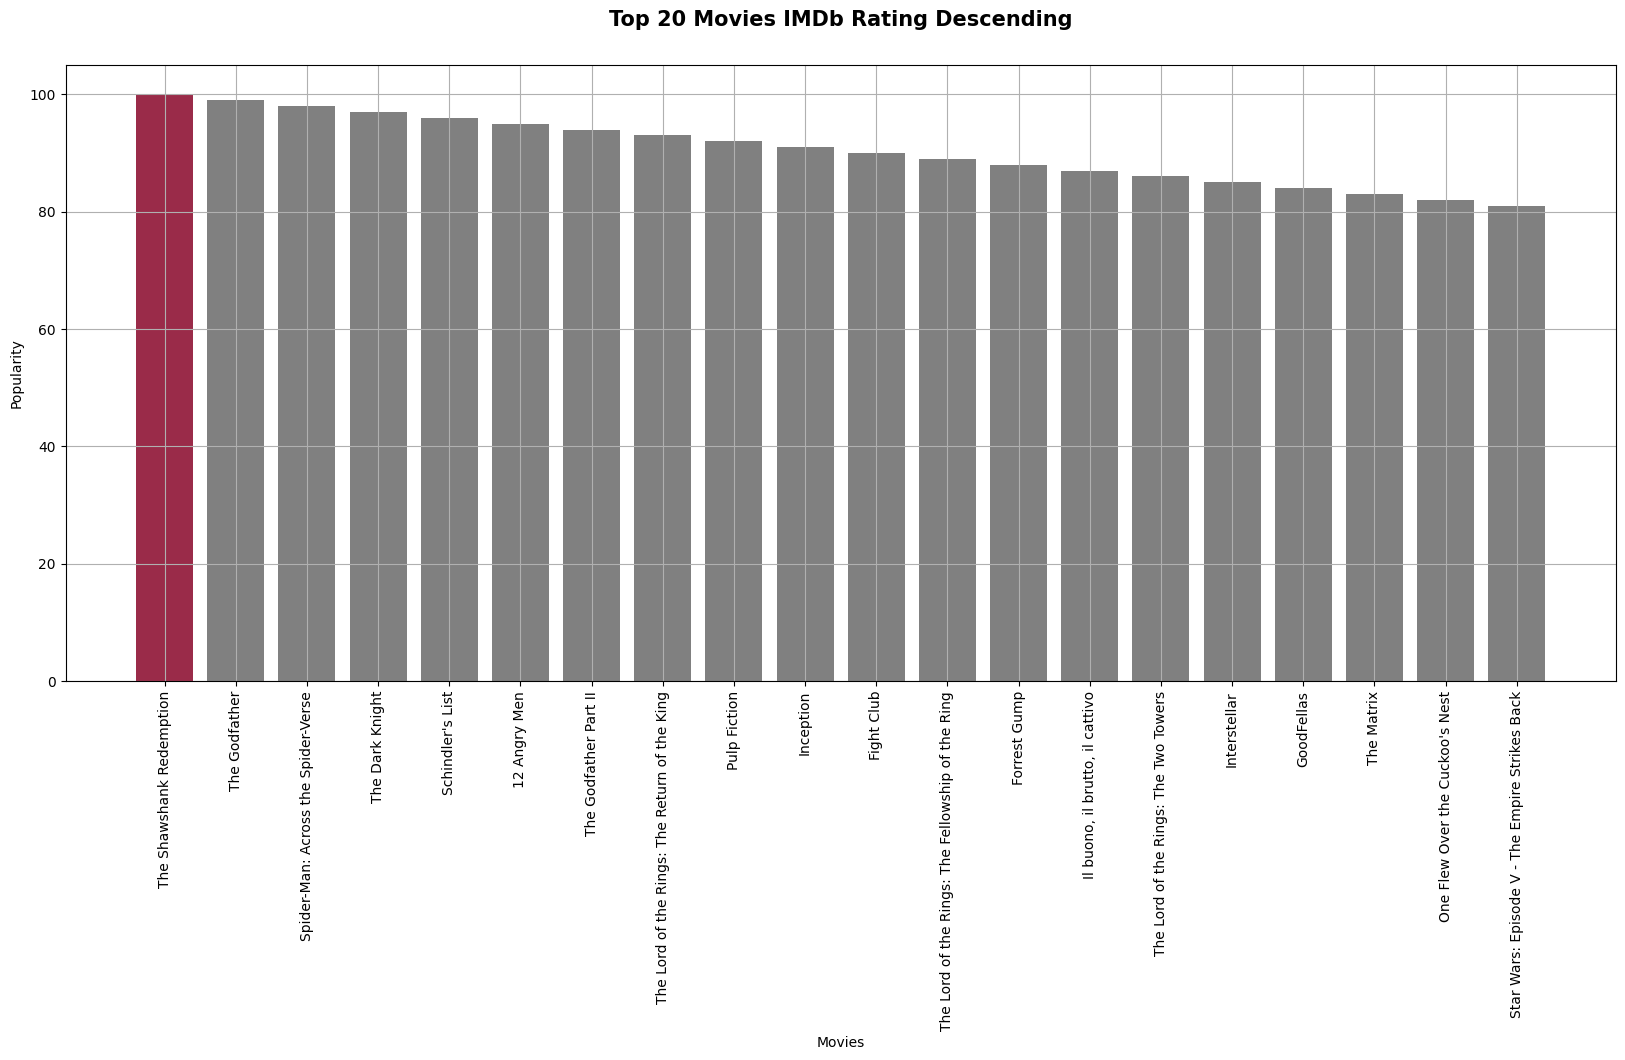

In [47]:
# Top 20 Movies IMDb Rating Descending
list_top_100 = list(dict.fromkeys(df_reviews["movie"].sort_index(ascending=True)))
list_index_top_100 = [i for i, v in enumerate(list_top_100)][::-1]
df_top_100 = pd.DataFrame(list(zip(list_top_100,list_index_top_100)), columns =['Movies', "Popularity"]).head(20)

list_colors = ['grey' if s < max(df_top_100["Popularity"]) else '#9A2B49' for s in df_top_100["Popularity"]]
plt.figure(figsize=(20,8))
plt.bar(df_top_100["Movies"], df_top_100["Popularity"], color=list_colors)
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.xticks(fontsize='10', rotation = 90)
plt.title("Top 20 Movies IMDb Rating Descending", fontweight='bold', fontsize='15', y=1.05)

plt.grid()
plt.show()

## Tokenization

In [48]:
def reduce_lengthening(text: str) -> str:
    """
    Reduces repeated characters in a word to two characters.

    Args:
        text (str): The input text.

    Returns:
        str: Text with reduced lengthening.

    """
    pattern = re.compile(r"(\w)\1{2,}", re.IGNORECASE)
    return pattern.sub(r"\1\1", text)

## Normalization
---
### Stemming

In [49]:
porter_stemmer=PorterStemmer()

### Stop Word Removal

In [50]:
_stop_words = stopwords.words('english')

### Lemmatization

In [51]:
lemmatizer = WordNetLemmatizer()

In [96]:
def get_wordnet_pos(treebank_tag:str) -> str:
    """
    Maps the treebank POS tags to WordNet POS tags.

    Parameters:
        treebank_tag (str): The POS tag from the treebank.

    Returns:
        str: The corresponding WordNet POS tag.

    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.ADJ_SAT

In [124]:
def preprocessor_remove_special_chars(text: str, exclude_words: list = []) -> str:
    """
    Preprocesses the text by removing special characters, numbers, and applying lemmatization or stemming.

    Args:
        text (str): The input text.

    Returns:
        str: Preprocessed text.

    """
    text=text.lower().strip()
    text=re.sub(r"[^\w\s]|[0-9]"," ",text)
    text=re.sub(r"[!@#~`%^&*(){};:/<>?\|_]", " ", text)
    tokens = word_tokenize(text)
    tokens_pos = nltk.pos_tag(tokens)
    sentences = []
    for word, tag in tokens_pos:
        _word = reduce_lengthening(word)
        root_word = lemmatizer.lemmatize(_word, pos=get_wordnet_pos(tag))
        if root_word == _word:
            root_word = porter_stemmer.stem(_word, to_lowercase=False)
        if root_word.lower().strip() not in _stop_words and root_word.lower().strip() not in exclude_words:
            sentences.append(root_word)
    
    text = " ".join(set(sentences))

    return text

### Bag-of-Word

In [145]:
_count_content = CountVectorizer(stop_words='english', preprocessor=preprocessor_remove_special_chars)

In [146]:
# Generate Bag-of-words
def generate_bag_of_words(content: str) -> object:
    """
    Generate a bag-of-words representation for the given content.

    Parameters:
        content (list): A list of strings representing the content.

    Returns:
        scipy.sparse matrix: The bag-of-words representation.

    """
    _start = time.time()
    print("Started:", datetime.datetime.now())

    bag_of_words = _count_content.fit_transform(content)

    _end = time.time()
    print("Ended:", datetime.datetime.now())
    print("DURATION:", timedelta(seconds=_end - _start))
    
    return bag_of_words

In [147]:
bag_of_words = generate_bag_of_words(df_reviews["content"])

Started: 2023-06-20 11:40:51.214813
Ended: 2023-06-20 11:45:03.539859
DURATION: 0:04:12.325044


In [148]:
bag_of_words.shape

(20311, 38503)

In [149]:
all_words = pd.DataFrame(bag_of_words.toarray(), columns=_count_content.get_feature_names_out())
list_words = dict(zip(_count_content.get_feature_names_out(),bag_of_words.toarray().sum(axis=0)))

In [150]:
# Frequency of Top 50 Words with Bag-of-Words
def frequency_words(list_words: list, title: str) -> None:
    """
    Plot the frequency of the top 50 words from a list using a bag-of-words representation.

    Parameters:
        list_words (list): A list of words.
        title (str): The title for the plot.

    Returns:
        None

    """
    plt.figure(figsize=(20,10))
    plt.title(title, fontweight='bold', fontsize='15', y=1.01)
    FreqDist(list_words).plot(50, cumulative=False)
    plt.show()

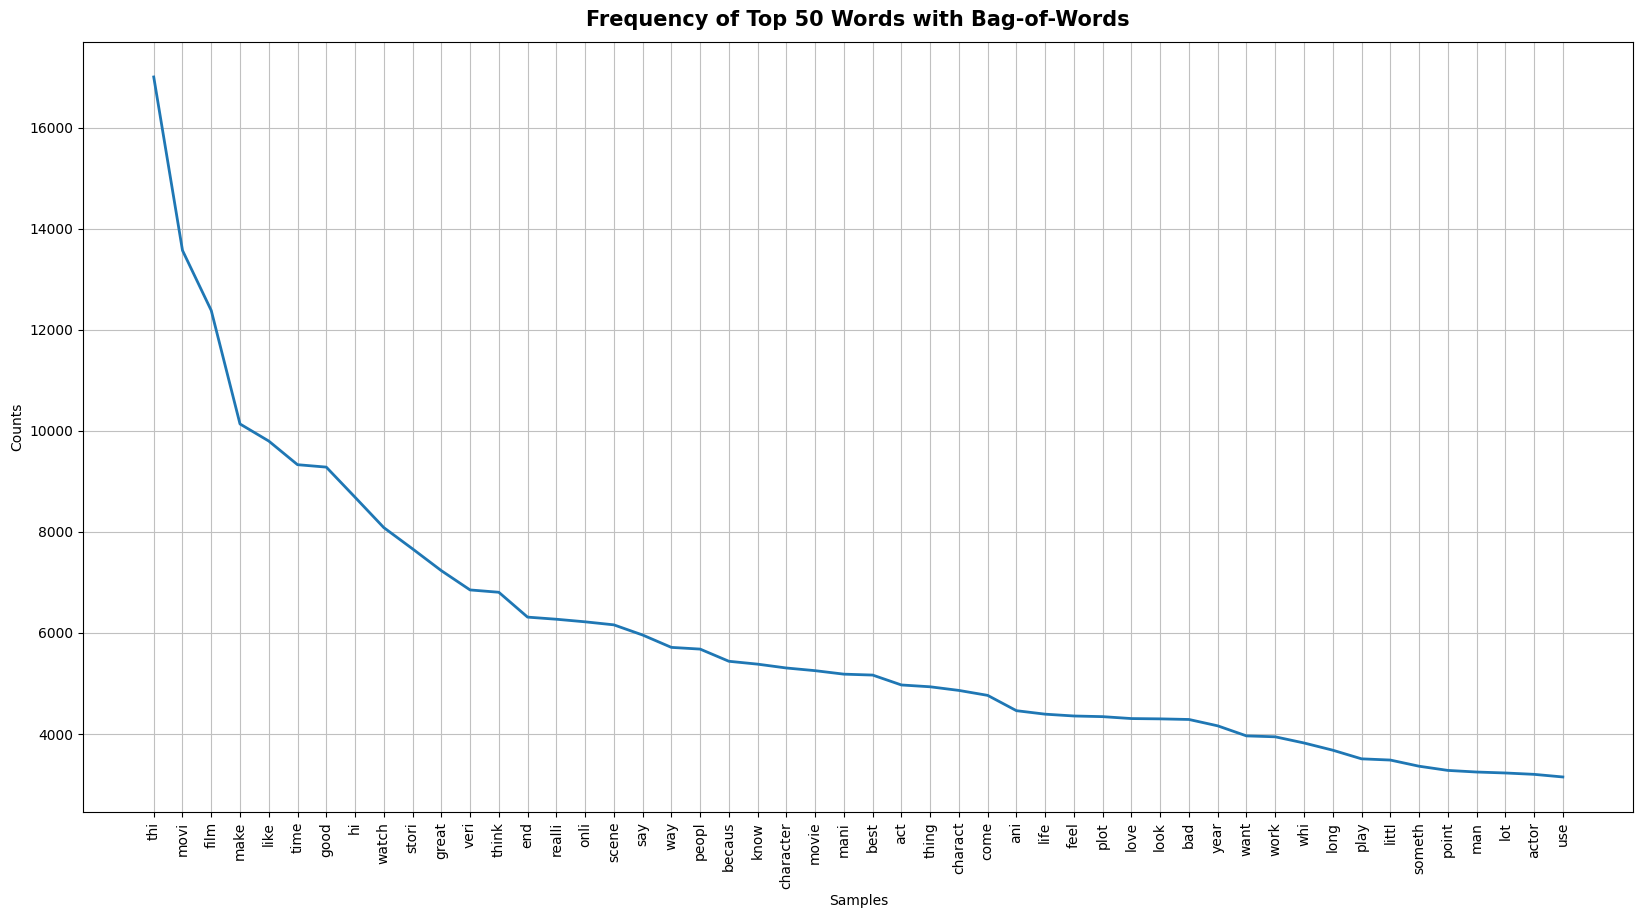

In [151]:
frequency_words(list_words, "Frequency of Top 50 Words with Bag-of-Words")

In [152]:
# Frequency of Top 100 Words with Bag-of-Words
def frequency_word_cloud_words(all_words: list, title: str) -> None:
    """
    Generate a word cloud of the top 100 words using a bag-of-words representation.

    Parameters:
        all_words (list): A list of words.
        title (str): The title for the word cloud.

    Returns:
        None

    """
    plt.subplots(figsize=(12,12))
    wordcloud=WordCloud(
        background_color="white",
        stopwords=_stop_words,
        width=1024,
        scale=5,
        max_font_size=100, 
        height=768).generate(" ".join(all_words.sample(100)))
    plt.imshow(wordcloud)
    plt.title(title, fontweight='bold', fontsize='15', y=1.05)
    plt.axis("off")
    plt.show()

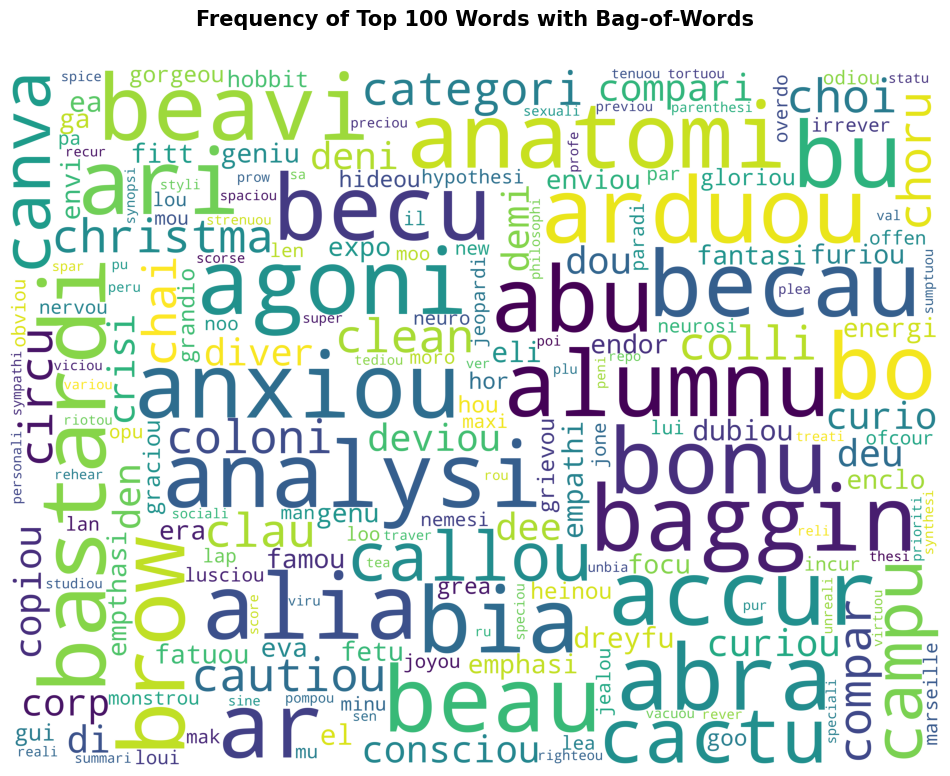

In [153]:
frequency_word_cloud_words(all_words, "Frequency of Top 100 Words with Bag-of-Words")

### TF-IDF

In [154]:
_count_content_tfidf = TfidfVectorizer(stop_words='english', preprocessor=preprocessor_remove_special_chars)

In [155]:
# Generate TF-IDF
def generate_tf_idf(content: list) -> object:
    """
    Generate a TF-IDF representation for the given content.

    Parameters:
        content (list): A list of strings representing the content.

    Returns:
        scipy.sparse matrix: The TF-IDF representation.

    """
    _start = time.time()
    print("Started:", datetime.datetime.now())

    tf_idf_words = _count_content_tfidf.fit_transform(content)

    _end = time.time()
    print("Ended:", datetime.datetime.now())
    print("DURATION:", timedelta(seconds=_end - _start))
    
    return tf_idf_words

In [156]:
tf_idf_words = generate_tf_idf(df_reviews["content"])

Started: 2023-06-20 11:45:18.178881
Ended: 2023-06-20 11:49:33.759757
DURATION: 0:04:15.580892


In [157]:
tf_idf_words.shape

(20311, 38503)

In [158]:
all_words_tfidf = pd.DataFrame(tf_idf_words.toarray(), columns=_count_content_tfidf.get_feature_names_out())
list_words_tfidf = dict(zip(_count_content_tfidf.get_feature_names_out(),tf_idf_words.toarray().sum(axis=0)))

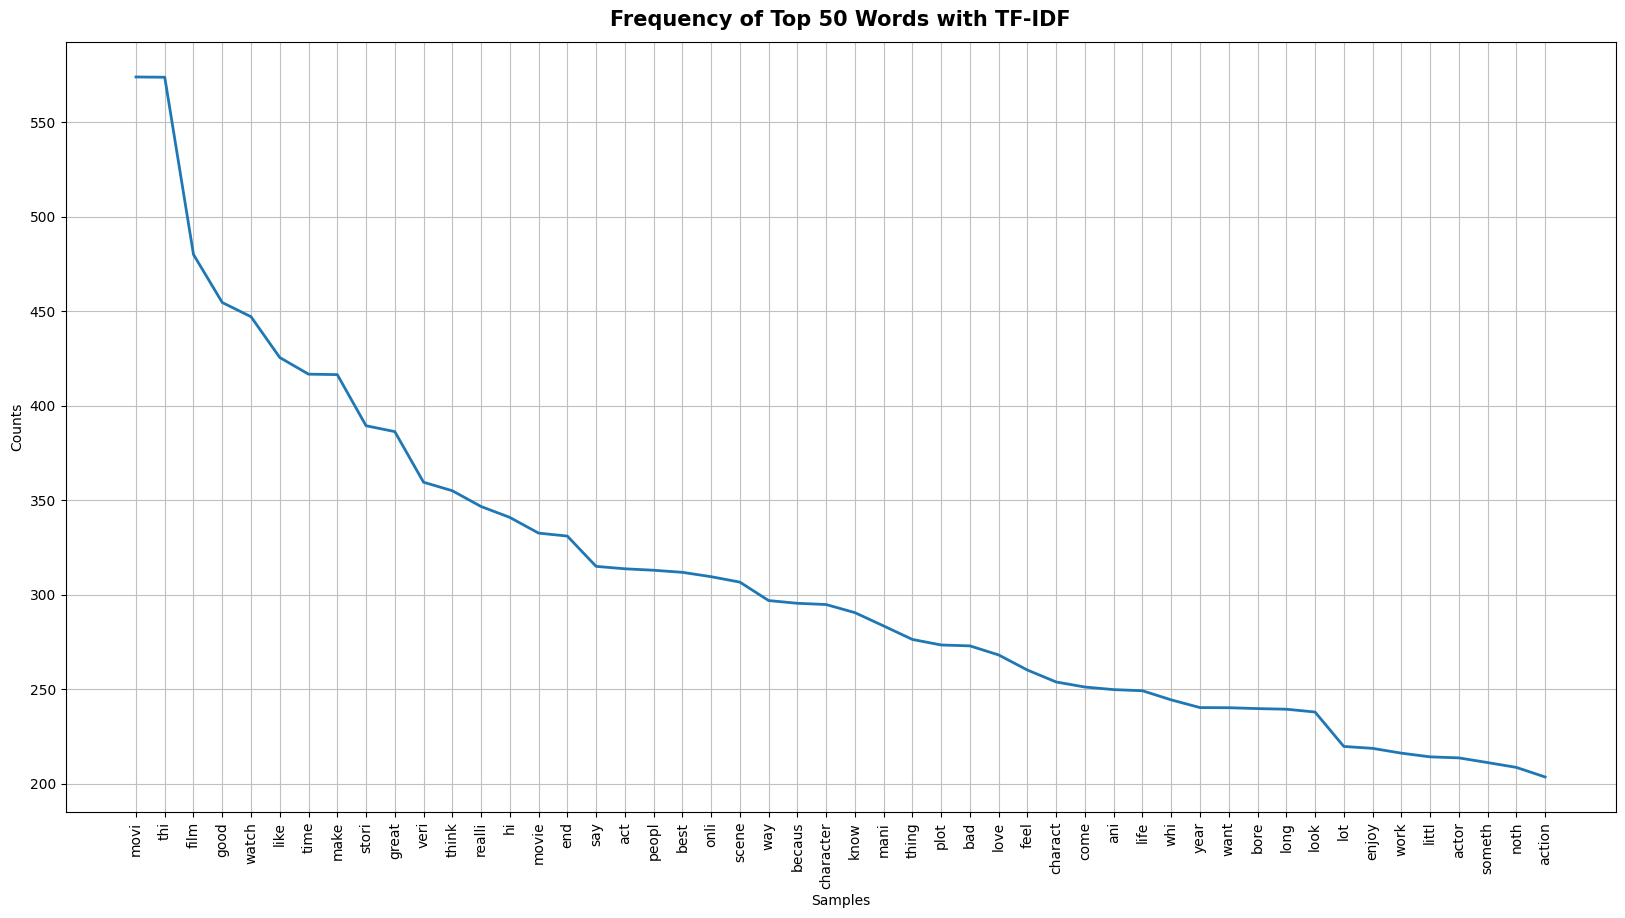

In [159]:
# Frequency of Top 50 Words with TF-IDF
frequency_words(list_words_tfidf, "Frequency of Top 50 Words with TF-IDF")

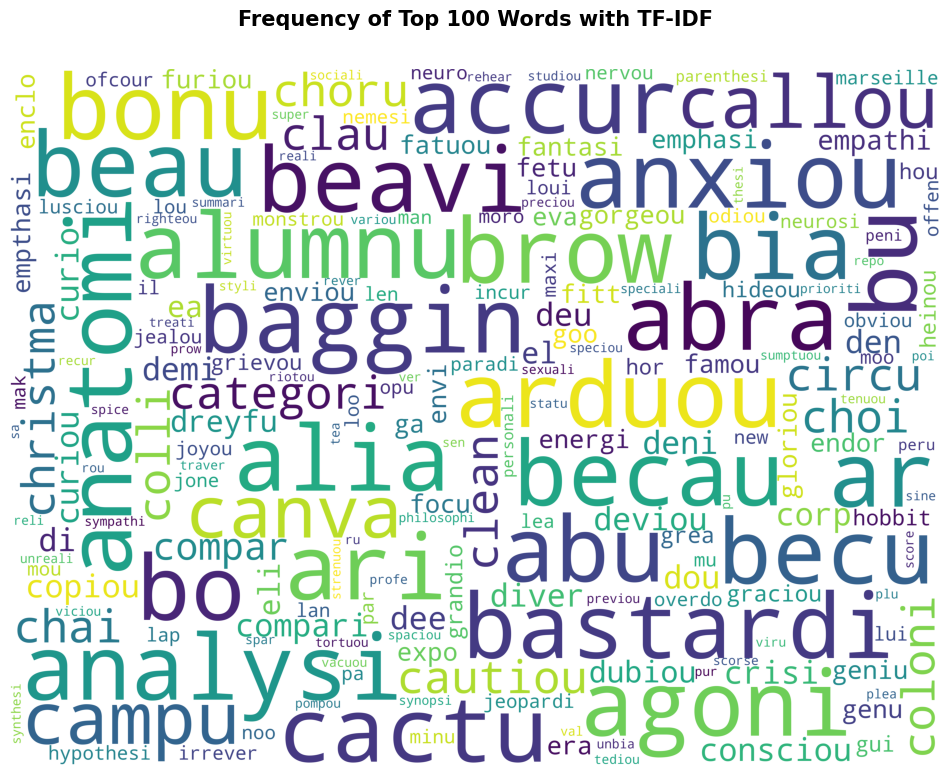

In [160]:
# Frequency of Top 100 Words with TF-IDF
frequency_word_cloud_words(all_words_tfidf, "Frequency of Top 100 Words with TF-IDF")

## Removing Noise

In [341]:
def get_correct_word(text: str) -> str:
    """
    Performs spelling correction on the input text using TextBlob.

    Args:
        text (str): The input text.

    Returns:
        str: Text with spelling corrections.

    """
    text = reduce_lengthening(text)
    try:
        text = nlp(text)._.outcome_spellCheck
    except:
        text = TextBlob(text).correct()
    text = remove_special_char(str(text))
    return text
    
def get_text_without_spelling_errors(values: object) -> object:
    """
    Applies spelling correction to a list of values.

    Args:
        values (list): The list of values to be processed.

    Returns:
        list: List of values with spelling corrections.

    """
    for index, value in enumerate(values):
        print(index, "\t", value[:20], end=" ")
        values[index] = get_correct_word(value)
        print("\t", emoji.emojize(":check_mark_button:"))
    
    return values

## Handling Spelling Errors

In [342]:
FILE_REVIEWS_SPELLING_ERRORS = "reviews_spelling_errors.csv"
if not os.path.exists(FILE_REVIEWS_SPELLING_ERRORS):
    _start = time.time()
    print("Started:", datetime.datetime.now())

    df_reviews["content_correct_word"] = df_reviews[["content"]].apply(get_text_without_spelling_errors)
    df_reviews.to_csv(FILE_REVIEWS_SPELLING_ERRORS)
    
    _end = time.time()
    print("Ended:", datetime.datetime.now())
    print("DURATION:", timedelta(seconds=_end - _start))
else:
    print("-"*50)
    print(emoji.emojize(':bookmark_tabs: READ FILE SPELLING_ERRORS...'))
    print("-"*50)
    df_reviews = pd.read_csv(FILE_REVIEWS_SPELLING_ERRORS, index_col=0)

Started: 2023-06-20 19:39:01.310682
0 	 Three words: "Cool H 	 ✅
1 	 Another one of those 	 ✅
2 	 It bugs me that this 	 ✅
3 	 just read the title. 	 ✅
4 	 Shawshank is nothing 	 ✅
5 	 The basic story for  	 ✅
6 	 This drama has been  	 ✅
7 	 This film is nothing 	 ✅
8 	 i had to comment, i  	 ✅
9 	 Sorry folks but this 	 ✅
10 	 There are some thing 	 ✅
11 	 Shawshank Redemption 	 ✅
12 	 Shawshank is on TNT  	 ✅
13 	 This is certainly a  	 ✅
14 	 awful. a dreadful di 	 ✅
15 	 Shawshank Redemption 	 ✅
16 	 Saying this is the # 	 ✅
17 	 After reading all th 	 ✅
18 	 #2 favorite movie in 	 ✅
19 	 I don't dislike this 	 ✅
20 	 People wonder why I  	 ✅
21 	 I'm sorry I don't me 	 ✅
22 	 It's not a bad film. 	 ✅
23 	 At the time of this  	 ✅
24 	 Don't get me wrong - 	 ✅
25 	 Well, after all the  	 ✅
26 	 I have no idea, why  	 ✅
27 	 It seems that every  	 ✅
28 	 I enjoyed this the f 	 ✅
29 	 I just don't know ho 	 ✅
30 	 this film is very co 	 ✅
31 	 This is quite far fr 	 ✅
32 	 This movi

In [347]:
EXCLUDE_WORDS = ["thi", "like", "ar", "el", "aand"]

In [348]:
def get_list_proprocessor(text: str) -> list:
    """
    Preprocesses the text using the preprocessor_remove_special_chars function and returns a list of tokens.

    Args:
        text (str): The input text.

    Returns:
        list: List of preprocessed tokens.

    """
    return preprocessor_remove_special_chars(text, EXCLUDE_WORDS).split()

In [349]:
_start = time.time()
print("Started:", datetime.datetime.now())

df_reviews["content_cleaned_list"] = df_reviews["content_correct_word"].apply(get_list_proprocessor)
df_reviews["content_cleaned_lenght"] = df_reviews["content_cleaned_list"].apply(lambda x: len(x))
df_reviews["content_cleaned"] = df_reviews["content_cleaned_list"].apply(lambda x: " ".join(x))

_end = time.time()
print("Ended:", datetime.datetime.now())
print("DURATION:", timedelta(seconds=_end - _start))

Started: 2023-06-21 15:35:31.328135
Ended: 2023-06-21 15:40:34.104763
DURATION: 0:05:02.776523


In [350]:
bag_of_words = generate_bag_of_words(df_reviews["content_cleaned"])

Started: 2023-06-21 16:13:10.496703
Ended: 2023-06-21 16:15:49.944125
DURATION: 0:02:39.448315


In [351]:
bag_of_words.shape

(20311, 20887)

In [352]:
all_words = pd.DataFrame(bag_of_words.toarray(), columns=_count_content.get_feature_names_out())
list_words = dict(zip(_count_content.get_feature_names_out(),bag_of_words.toarray().sum(axis=0)))

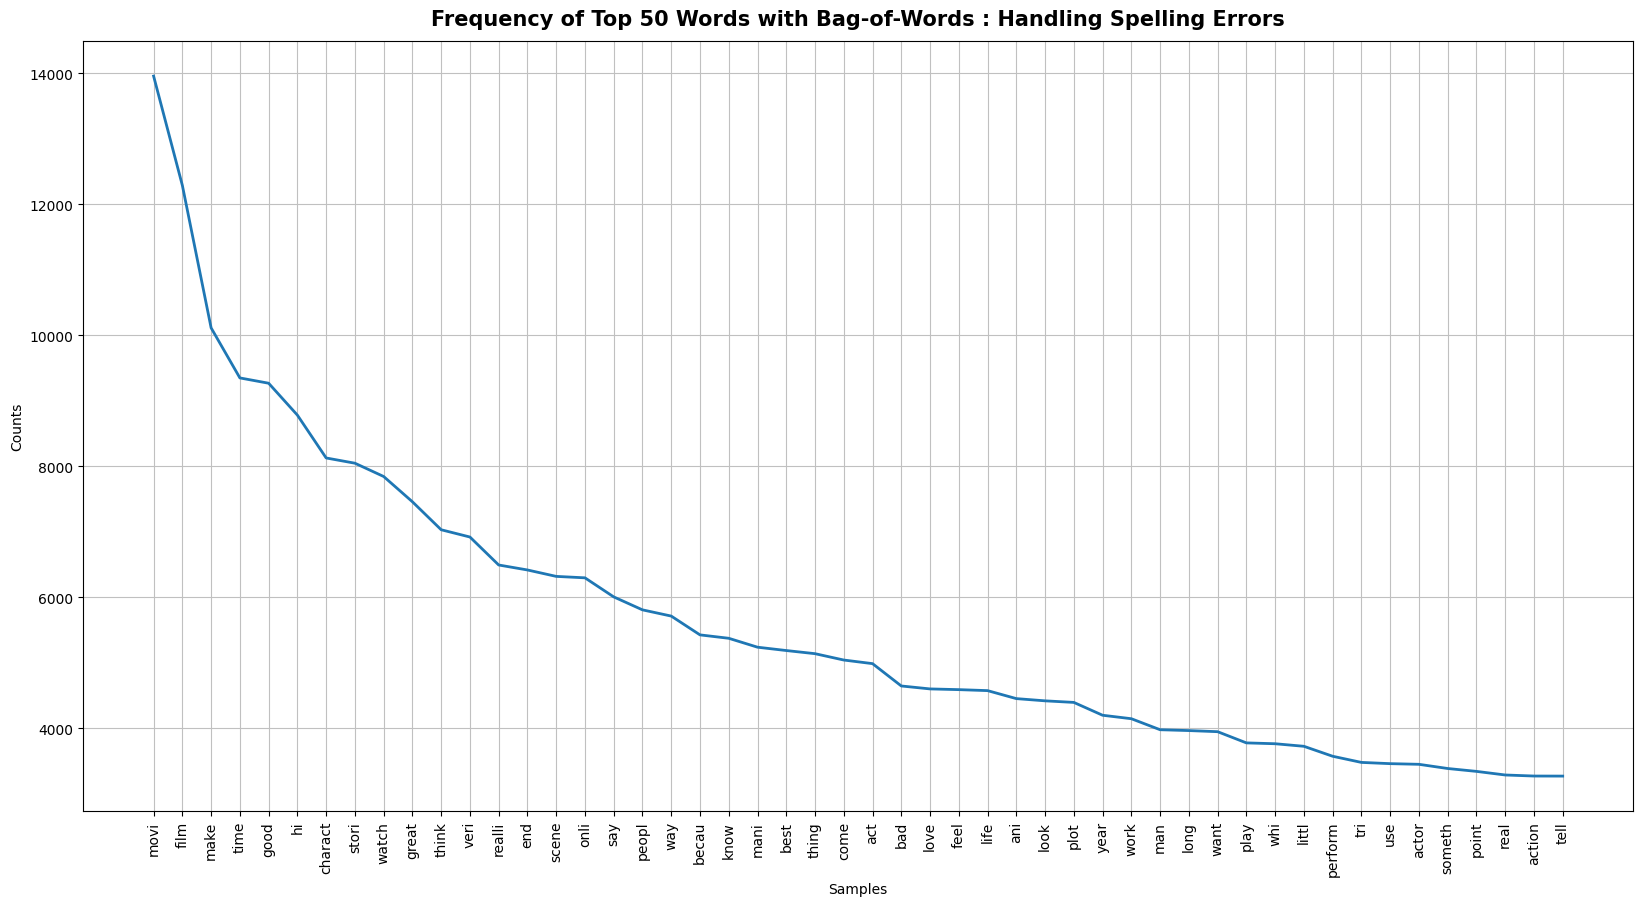

In [353]:
frequency_words(list_words, "Frequency of Top 50 Words with Bag-of-Words : Handling Spelling Errors")

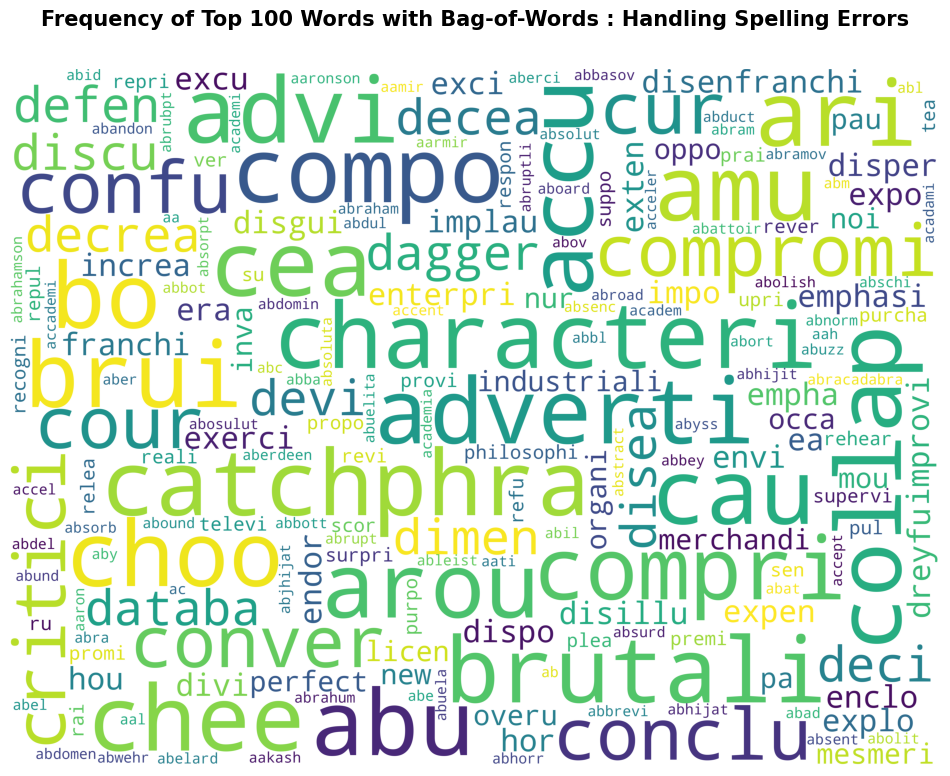

In [354]:
frequency_word_cloud_words(all_words, "Frequency of Top 100 Words with Bag-of-Words : Handling Spelling Errors")

In [355]:
tf_idf_words = generate_tf_idf(df_reviews["content_cleaned"])

Started: 2023-06-21 16:17:00.158116
Ended: 2023-06-21 16:19:46.895510
DURATION: 0:02:46.738312


In [356]:
tf_idf_words.shape

(20311, 5000)

In [357]:
all_words_tfidf = pd.DataFrame(tf_idf_words.toarray(), columns=_count_content_tfidf.get_feature_names_out())
list_words_tfidf = dict(zip(_count_content_tfidf.get_feature_names_out(),tf_idf_words.toarray().sum(axis=0)))

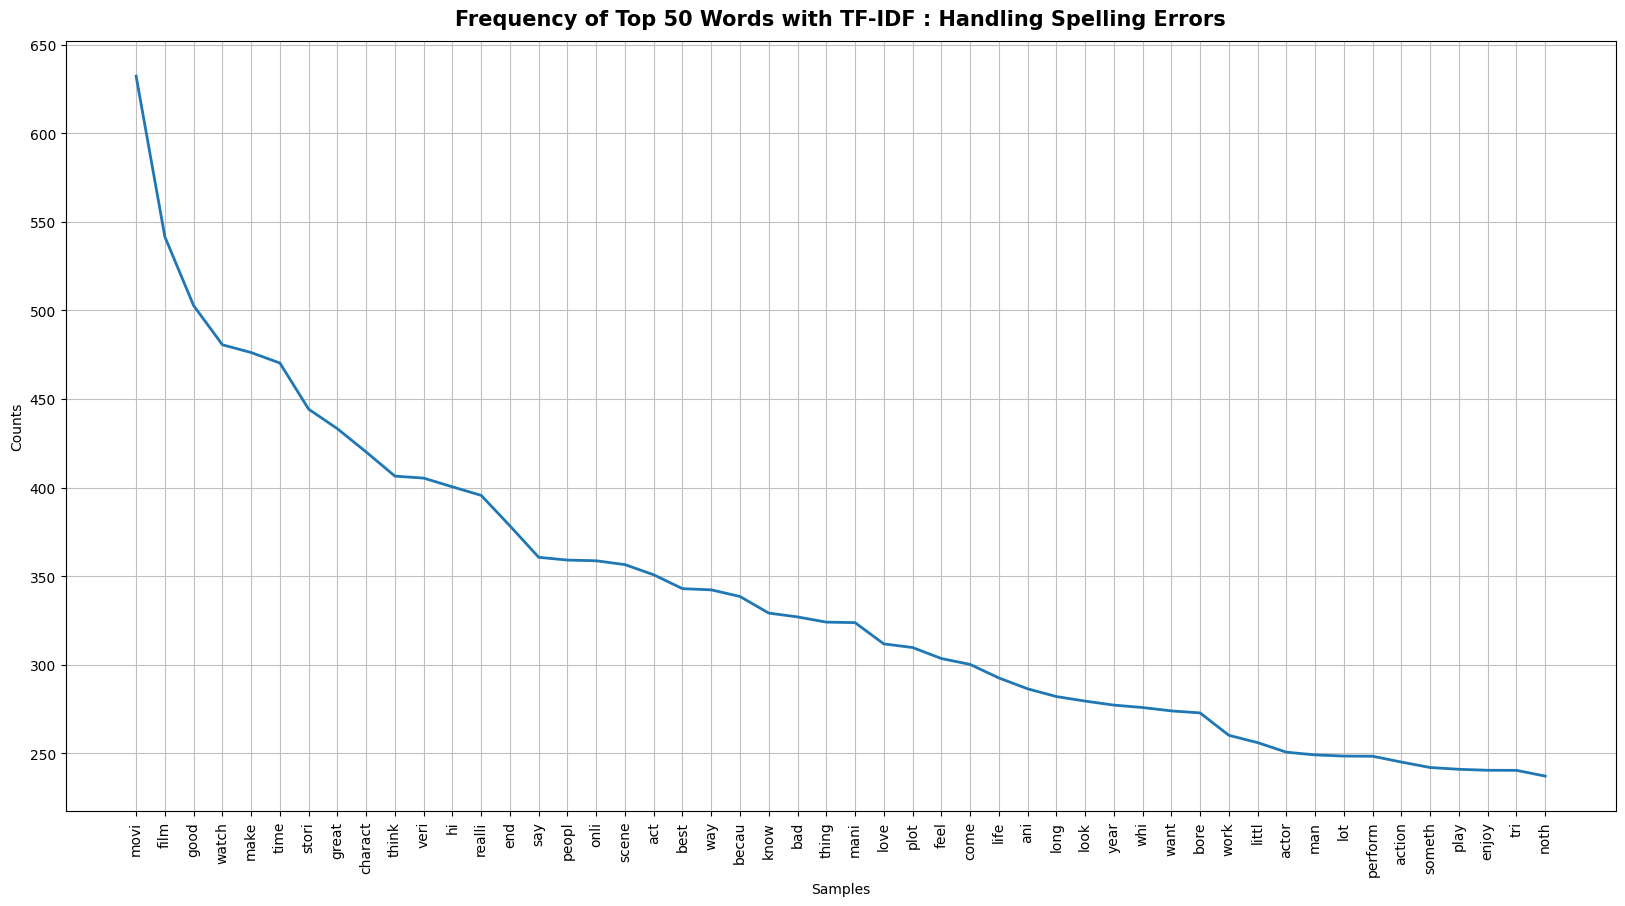

In [358]:
frequency_words(list_words_tfidf, "Frequency of Top 50 Words with TF-IDF : Handling Spelling Errors")

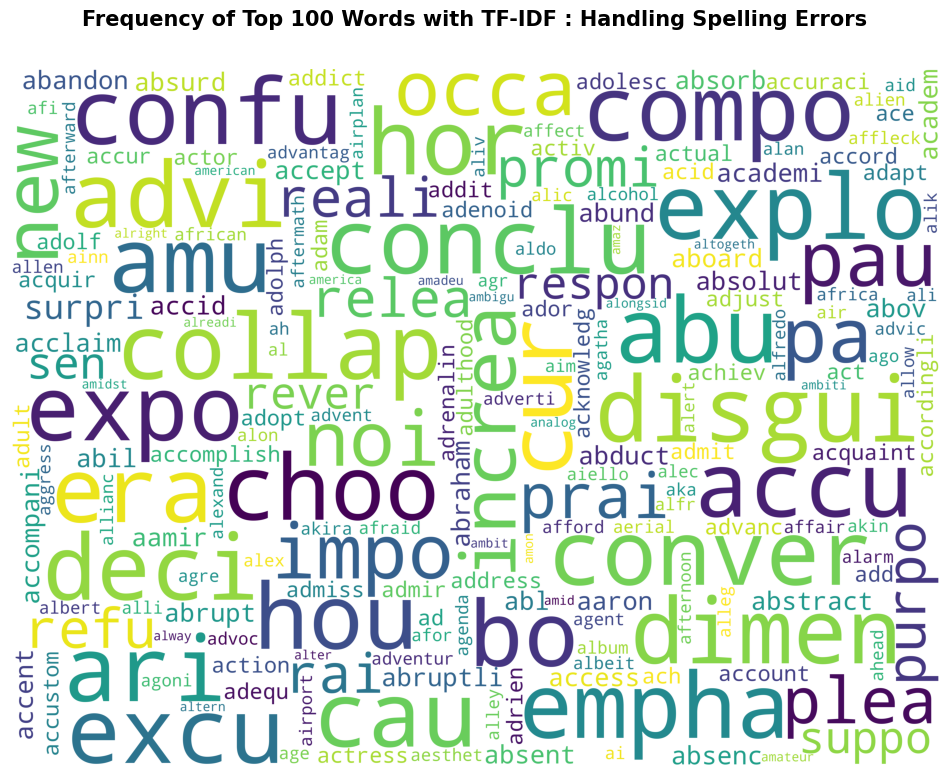

In [359]:
frequency_word_cloud_words(all_words_tfidf, "Frequency of Top 100 Words with TF-IDF : Handling Spelling Errors")

### N-Grams

In [360]:
def generate_n_grams(value: str, n: int) -> int:
    """
    Generates N-grams from a given string.

    Args:
        value (str): The input string.
        n (int): The size of the N-gram.

    Returns:
        list: List of N-grams.

    """
    return list(ngrams(value, n))

In [361]:
# Create columns to identify unigram, bigram, trigram
df_reviews["unigram"] = df_reviews["content_cleaned_list"].apply(generate_n_grams, n=1)
df_reviews["bigram"] = df_reviews["content_cleaned_list"].apply(generate_n_grams, n=2)
df_reviews["trigram"] = df_reviews["content_cleaned_list"].apply(generate_n_grams, n=3)

df_reviews["unigram_lenght"] = df_reviews["unigram"].apply(lambda x: len(x))
df_reviews["bigram_lenght"] = df_reviews["bigram"].apply(lambda x: len(x))
df_reviews["trigram_lenght"] = df_reviews["trigram"].apply(lambda x: len(x))

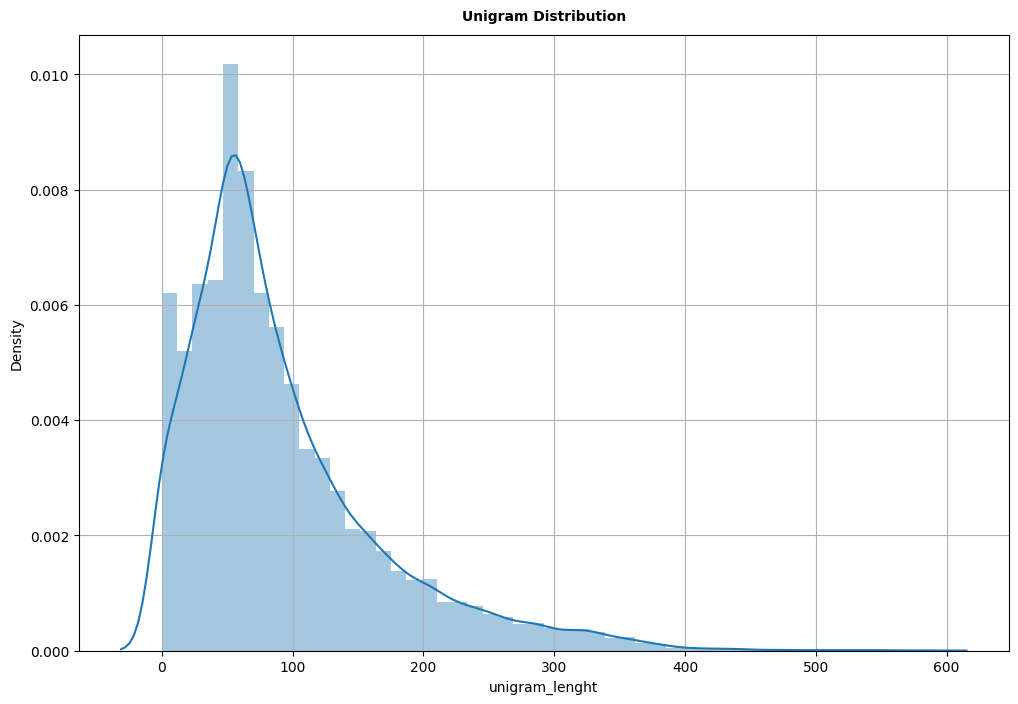

In [362]:
# Unigram Distribution
fig = plt.figure(figsize=(12,8))
sns.distplot(df_reviews['unigram_lenght'])
plt.title('Unigram Distribution', fontweight='bold', fontsize='10', y=1.01)
plt.grid()
plt.show()

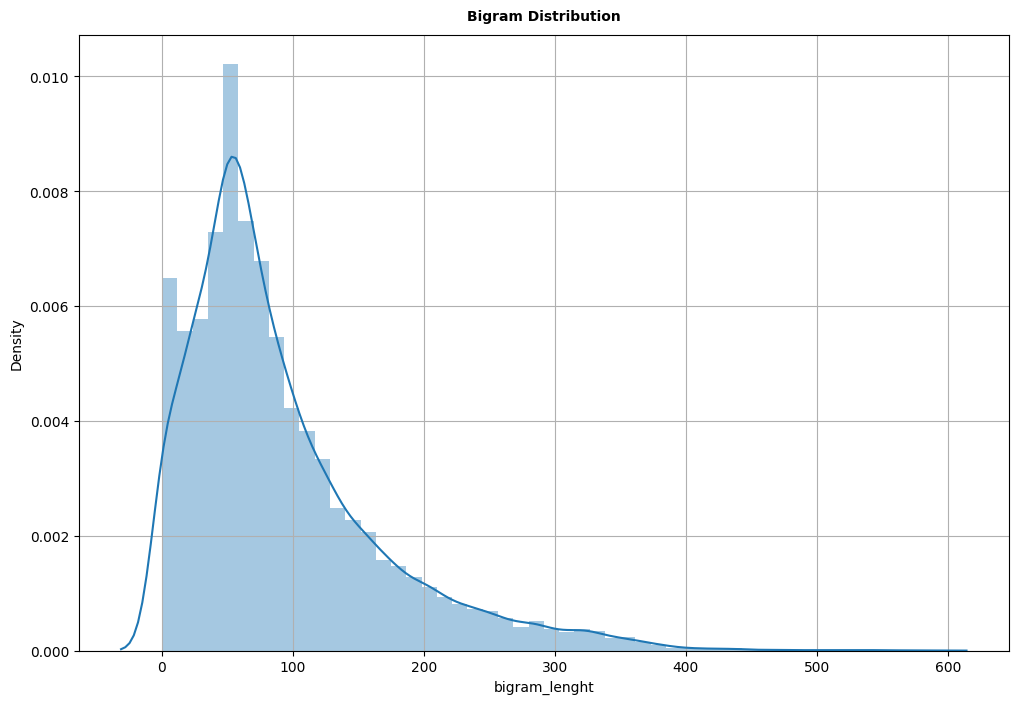

In [363]:
# Bigram Distribution
fig = plt.figure(figsize=(12,8))
sns.distplot(df_reviews['bigram_lenght'])
plt.title('Bigram Distribution', fontweight='bold', fontsize='10', y=1.01)
plt.grid()
plt.show()

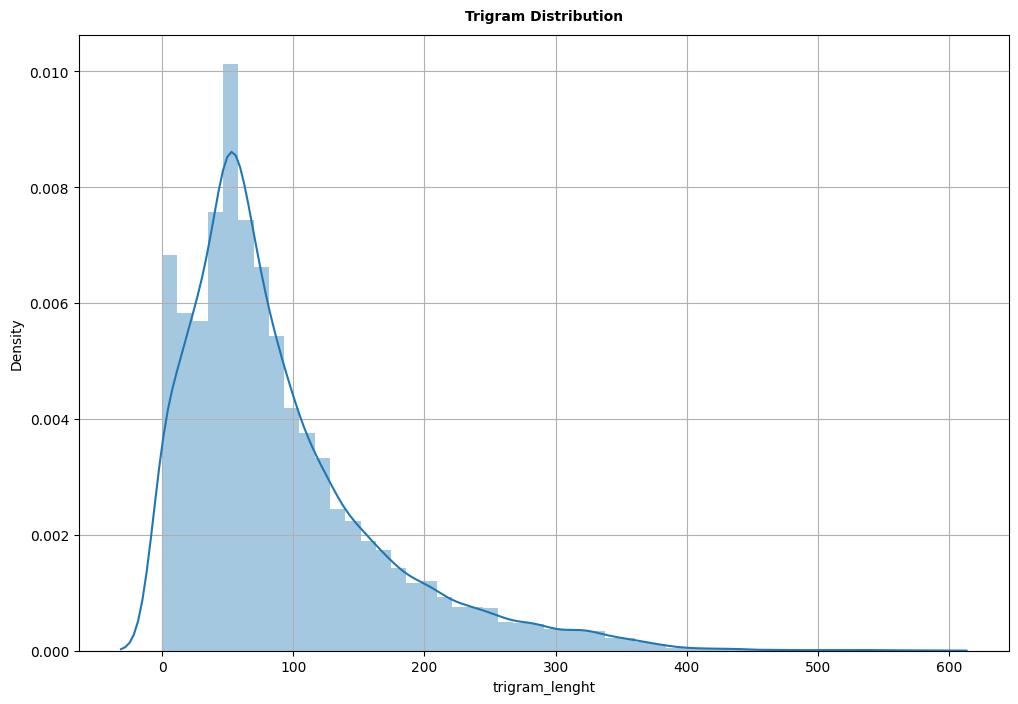

In [364]:
# Trigram Distribution
fig = plt.figure(figsize=(12,8))
sns.distplot(df_reviews['trigram_lenght'])
plt.title('Trigram Distribution', fontweight='bold', fontsize='10', y=1.01)
plt.grid()
plt.show()

# Modeling
### MultinomialNB

In [365]:
def get_metrics(model: object, true_value: object, pred_value: object) -> None:
    """
    Get metrics classification model
    :param text_model: title model
    :param true_value: true values
    :param pred_value: predicted values
    """
    print("-"*10, model.__class__.__name__, "-" * 10, "\n")
    
    print("Accuracy:", accuracy_score(Y_test, pred), "\n")
    print(classification_report(true_value, pred_value, digits=4))

    cm = confusion_matrix(true_value, pred_value, normalize='true')
    
    plt.subplots(figsize=(12,12))
    sns.heatmap(cm, fmt=".2f", annot=True,  cmap='Purples')
    plt.title(f"Confusion Matrix {model.__class__.__name__}")
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [366]:
y = df_reviews["rating"]

In [367]:
_count_content_tfidf = TfidfVectorizer(stop_words='english', preprocessor=preprocessor_remove_special_chars, max_features=5000)

In [368]:
_start = time.time()
print("Started:", datetime.datetime.now())
    
tf_idf_words = _count_content_tfidf.fit_transform(df_reviews["content_cleaned"])

_end = time.time()
print("Ended:", datetime.datetime.now())
print("DURATION:", timedelta(seconds=_end - _start))

Started: 2023-06-21 16:20:13.089852
Ended: 2023-06-21 16:22:58.825683
DURATION: 0:02:45.735704


In [369]:
X = tf_idf_words.toarray()

In [370]:
X.shape

(20311, 5000)

In [371]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [372]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((16248, 5000), (4063, 5000), (16248,), (4063,))

In [373]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

MultinomialNB()

In [374]:
pred = mnb.predict(X_test)

---------- MultinomialNB ---------- 

Accuracy: 0.22126507506768398 

              precision    recall  f1-score   support

           1     0.3326    0.4338    0.3765       355
           2     0.0000    0.0000    0.0000       302
           3     0.2857    0.0069    0.0135       289
           4     0.1429    0.0117    0.0216       343
           5     0.1756    0.1192    0.1420       386
           6     0.1566    0.2116    0.1800       430
           7     0.1491    0.2725    0.1927       466
           8     0.1825    0.1855    0.1840       496
           9     0.2254    0.3232    0.2656       495
          10     0.3410    0.4451    0.3861       501

    accuracy                         0.2213      4063
   macro avg     0.1991    0.2010    0.1762      4063
weighted avg     0.2036    0.2213    0.1928      4063



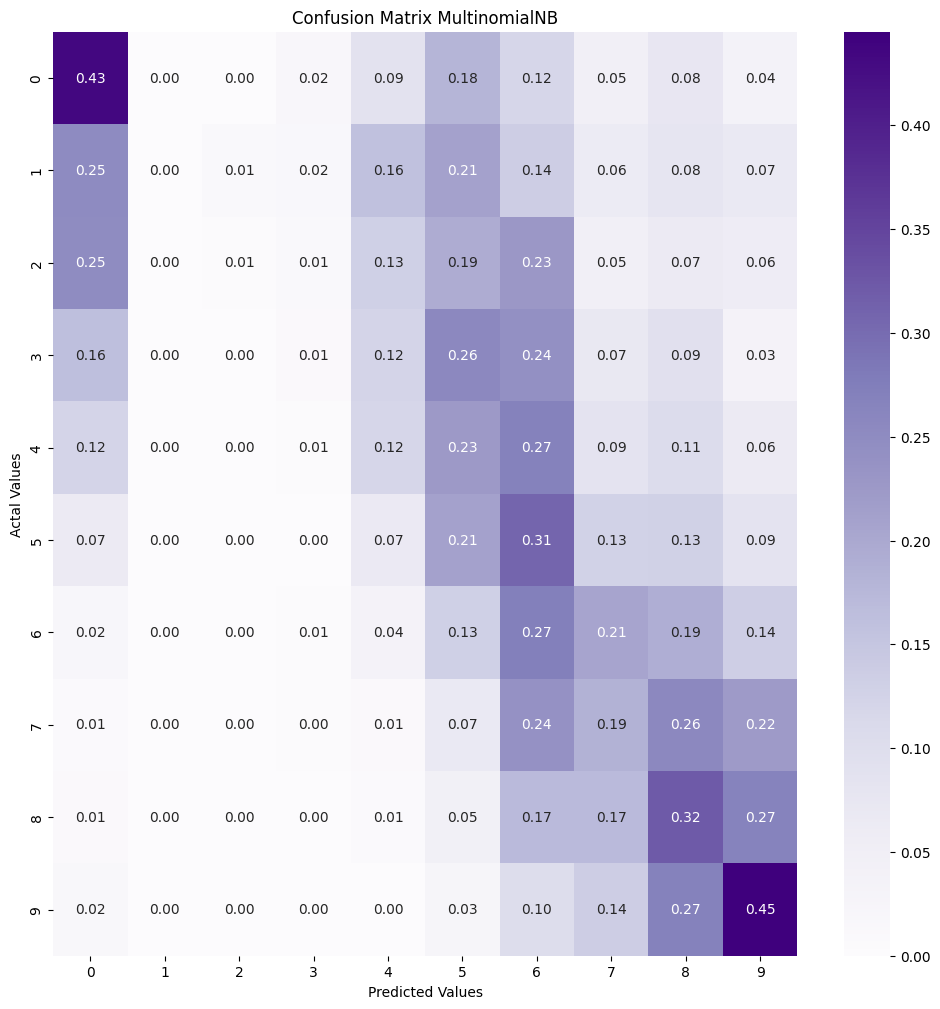

In [375]:
get_metrics(mnb, Y_test, pred)

## Save trained naive-bayes model and TfidfVectorizer

In [376]:
pickle.dump(_count_content_tfidf, open("tf_idf_words.pkl", "wb"))

In [377]:
pickle.dump(mnb, open("model_nb_classficication.pkl", "wb"))

## Load naive-bayes model and TfidfVectorizer

In [378]:
save_ft_idf = pickle.load(open("tf_idf_words.pkl", "rb"))

In [379]:
nb_model = pickle.load(open("model_nb_classficication.pkl", "rb"))

## Test model

In [380]:
def generate_rating(sentence):
    #sentence = get_correct_word(sentence)
    sen = save_ft_idf.transform([sentence]).toarray()
    res = nb_model.predict(sen)[0]
    
    return res

In [381]:
sen = "This is the wornderful movie of my life"
res = generate_rating(sen)
print(res)

9


In [382]:
sen = "This is the worst movie, I have ever seen in my life"
res = generate_rating(sen)
print(res)

1


In [383]:
sen = "THE MOVIE IS NOT GOOD, I have ever seen in my life"
res = generate_rating(sen)
print(res)

7


# TensorFlow Model

In [384]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model_tf = hub.load(model_url)

In [385]:
def embed(texts):
    return model_tf(texts)

In [409]:
_start = time.time()
print("Started:", datetime.datetime.now())

embeddings = embed(list(df_reviews["content_correct_word"]))
print('The embedding shape is:', embeddings.shape)

_end = time.time()
print("Ended:", datetime.datetime.now())
print("DURATION:", timedelta(seconds=_end - _start))

Started: 2023-06-21 16:48:46.398966
The embedding shape is: (20311, 512)
Ended: 2023-06-21 16:51:18.402165
DURATION: 0:02:32.003024


In [410]:
pca = PCA(n_components=100)
emb_2d = pca.fit_transform(embeddings)

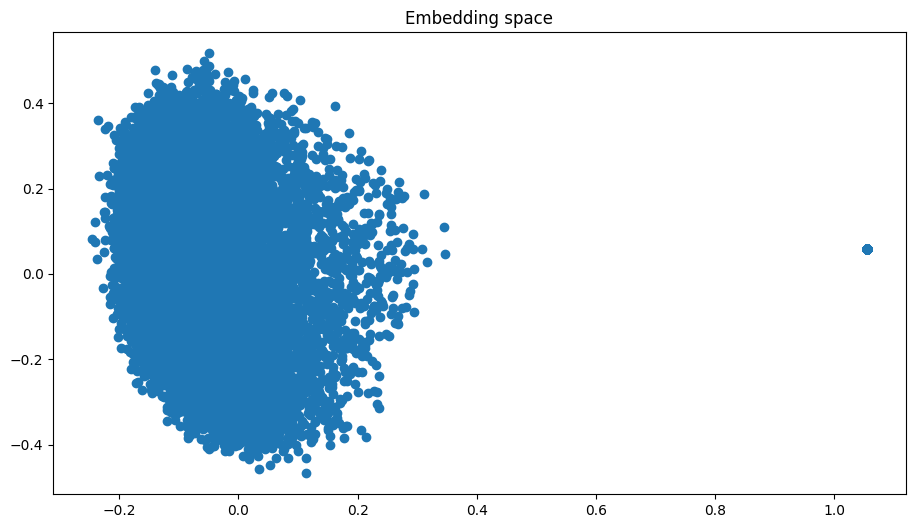

In [411]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [412]:
nn = NearestNeighbors(n_neighbors=10)

In [413]:
nn.fit(X_train, Y_train)
# Predict nearest neighbors
distances, indices = nn.kneighbors(X_test)

In [414]:
# Calculate metrics
_result = []
k = 4

for neighbors in indices:
    _total = 0
    for idx in neighbors:
        _total += idx
    if _total >= (k/2):
        _result.append(1)
    else:
        _result.append(0)

y_pred = _result
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.08737386167856263


In [415]:
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [416]:
def recommend_rating(text):
    #text = get_correct_word(text)
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    result = df_reviews["rating"].iloc[neighbors].tolist()
    if result:
        result = result[0]
    else:
        result = 0
    
    return result

In [417]:
sen = "This is the wornderful movie of my life"
res = recommend_rating(sen)
print(res)

9


In [418]:
sen = "This is the worst movie, I have ever seen in my life"
res = recommend_rating(sen)
print(res)

1


In [419]:
sen = "THE MOVIE IS NOT GOOD, I have ever seen in my life"
res = recommend_rating(sen)
print(res)

5


# Conclusion